<a href="https://colab.research.google.com/github/Sameer-Tahir/Project_DS/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries


In [ ]:
# !git clone https://github.com/Sameer-Tahir/Project_DS.git

In [37]:
# Import libraries
import pandas as pd   # data processing
import numpy as np    # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt

#Uploading Dataset


In [ ]:
df = pd.read_csv("/content/kernel_events_cleaned.csv")

In [ ]:
df

time  alarmtimer_alarmtimer_cancel  alarmtimer_alarmtimer_fired  \
0       5.001477                             0                            0   
1       5.001487                             0                            0   
2       5.001641                             0                            0   
3       5.003762                             0                            0   
4      10.065740                             0                            0   
...          ...                           ...                          ...   
6161  283.646045                             0                            0   
6162  288.714173                             0                            0   
6163  293.790086                             0                            0   
6164  298.861925                             0                            0   
6165  300.505634                             0                            0   

      alarmtimer_alarmtimer_start  alarmtimer_alarmtimer_suspend  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
6161                            0                              0   
6162                            0                              0   
6163                            0                              0   
6164                            0                              0   
6165                            0                              0   

      alignment-faults   ase_spec  block_block_bio_backmerge  \
0                    0  693371795                          0   
1                    0  699964025                          0   
2                    0  549770341                          0   
3                    0  571970875                          0   
4                    0  553199786                          0   
...                ...        ...                        ...   
6161                 0    5463807                          0   
6162                 0   10977108                          0   
6163                 0    3683292                          0   
6164                 0    5165840                          0   
6165                 0    3909471                          0   

      block_block_bio_bounce  block_block_bio_complete  ...  \
0                          0                         0  ...   
1                          0                         0  ...   
2                          0                         0  ...   
3                          0                         0  ...   
4                          0                         0  ...   
...                      ...                       ...  ...   
6161                       0                         0  ...   
6162                       0                         0  ...   
6163                       0                         0  ...   
6164                       0                         0  ...   
6165                       0                         0  ...   

      writeback_writeback_wait_iff_congested  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
6161                                       0   
6162                                       0   
6163                                       0   
6164                                       0   
6165                                       0   

      writeback_writeback_wake_background  writeback_writeback_write_inode  \
0                                       0                        

# IDA and EDA
(preprocessing already performed in seperate files)

In [ ]:
df

time  alarmtimer_alarmtimer_cancel  alarmtimer_alarmtimer_fired  \
0       5.001477                             0                            0   
1       5.001487                             0                            0   
2       5.001641                             0                            0   
3       5.003762                             0                            0   
4      10.065740                             0                            0   
...          ...                           ...                          ...   
6161  283.646045                             0                            0   
6162  288.714173                             0                            0   
6163  293.790086                             0                            0   
6164  298.861925                             0                            0   
6165  300.505634                             0                            0   

      alarmtimer_alarmtimer_start  alarmtimer_alarmtimer_suspend  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
6161                            0                              0   
6162                            0                              0   
6163                            0                              0   
6164                            0                              0   
6165                            0                              0   

      alignment-faults   ase_spec  block_block_bio_backmerge  \
0                    0  693371795                          0   
1                    0  699964025                          0   
2                    0  549770341                          0   
3                    0  571970875                          0   
4                    0  553199786                          0   
...                ...        ...                        ...   
6161                 0    5463807                          0   
6162                 0   10977108                          0   
6163                 0    3683292                          0   
6164                 0    5165840                          0   
6165                 0    3909471                          0   

      block_block_bio_bounce  block_block_bio_complete  ...  \
0                          0                         0  ...   
1                          0                         0  ...   
2                          0                         0  ...   
3                          0                         0  ...   
4                          0                         0  ...   
...                      ...                       ...  ...   
6161                       0                         0  ...   
6162                       0                         0  ...   
6163                       0                         0  ...   
6164                       0                         0  ...   
6165                       0                         0  ...   

      writeback_writeback_wait_iff_congested  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
6161                                       0   
6162                                       0   
6163                                       0   
6164                                       0   
6165                                       0   

      writeback_writeback_wake_background  writeback_writeback_write_inode  \
0                                       0                        

In [ ]:
# Separate columns by type
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Display counts
print(f"Number of numerical columns: {len(numerical_cols)}")
print(f"Number of categorical columns: {len(categorical_cols)}")

# Display categorical column names
print("Categorical columns:")
print(categorical_cols.tolist())

Number of numerical columns: 906
Number of categorical columns: 5
Categorical columns:
['State', 'Attack', 'Scenario', 'Label', 'interface']


In [ ]:
print("Column Data Types:")
print(df.dtypes)

Column Data Types:
time                             float64
alarmtimer_alarmtimer_cancel       int64
alarmtimer_alarmtimer_fired        int64
alarmtimer_alarmtimer_start        int64
alarmtimer_alarmtimer_suspend      int64
                                  ...   
State                             object
Attack                            object
Scenario                          object
Label                             object
interface                         object
Length: 911, dtype: object


In [ ]:
# Loop through each categorical column and print unique values
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'State':
['Charging' 'idle']

Unique values in 'Attack':
['cryptojacking' 'none' 'aggressive-scan' 'icmp-flood'
 'icmp-fragmentation_old' 'os-fingerprinting' 'port-scan' 'push-ack-flood'
 'serice-detection' 'syn-flood' 'syn-stealth' 'tcp-flood' 'udp-flood'
 'vuln-scan' 'icmp-fragmentation' 'service-detection'
 'synonymous-ip-flood' 'os-scan']

Unique values in 'Scenario':
['Cryptojacking' 'Benign' 'Recon' 'DoS']

Unique values in 'Label':
['attack' 'benign']

Unique values in 'interface':
['any' 'none' 'ocpp' 'iso15118']


In [ ]:
def check_zero_columns(df, name="Kernel"):
    all_zero_cols = []
    mixed_cols = []

    for col in df.columns:
        # Skip categorical columns (object/string type)
        if df[col].dtype == 'object':
            continue

        # Check if column is all null
        if df[col].isnull().all():
            all_zero_cols.append(col)
        # Check if column is all 0
        elif (df[col] == 0).all():
            all_zero_cols.append(col)
        # Check if column has some 0 and some non-0
        elif (df[col] == 0).any():
            mixed_cols.append(col)

    print(f"\n--- {name} ---")
    print(f"Columns ALL zero/null ({len(all_zero_cols)}): {all_zero_cols}")
    print(f"Columns with MIXED values (zeros + non-zeros) ({len(mixed_cols)}): {mixed_cols}")

# Run for both datasets
check_zero_columns(df, "Kernel Events")


--- Kernel Events ---
Columns ALL zero/null (685): ['alarmtimer_alarmtimer_cancel', 'alarmtimer_alarmtimer_fired', 'alarmtimer_alarmtimer_start', 'alarmtimer_alarmtimer_suspend', 'alignment-faults', 'block_block_bio_bounce', 'block_block_bio_complete', 'block_block_bio_frontmerge', 'block_block_rq_merge', 'block_block_rq_remap', 'block_block_rq_requeue', 'block_block_split', 'bpf-output', 'bus_access_shared', 'cid_write_retired', 'clk_clk_disable', 'clk_clk_disable_complete', 'clk_clk_enable', 'clk_clk_enable_complete', 'clk_clk_prepare', 'clk_clk_prepare_complete', 'clk_clk_set_duty_cycle', 'clk_clk_set_duty_cycle_complete', 'clk_clk_set_max_rate', 'clk_clk_set_min_rate', 'clk_clk_set_parent', 'clk_clk_set_parent_complete', 'clk_clk_set_phase', 'clk_clk_set_phase_complete', 'clk_clk_set_rate', 'clk_clk_set_rate_complete', 'clk_clk_set_rate_range', 'clk_clk_unprepare', 'clk_clk_unprepare_complete', 'crypto_spec', 'dummy', 'emulation-faults', 'exc_fiq', 'exc_hvc', 'exc_smc', 'exc_trap_

In [ ]:
df = df.loc[:, (df != 0).any(axis=0)]


In [ ]:
df

time   ase_spec  block_block_bio_backmerge  block_block_bio_queue  \
0       5.001477  693371795                          0                      0   
1       5.001487  699964025                          0                      0   
2       5.001641  549770341                          0                      0   
3       5.003762  571970875                          0                      0   
4      10.065740  553199786                          0                      0   
...          ...        ...                        ...                    ...   
6161  283.646045    5463807                          0                      0   
6162  288.714173   10977108                          0                      0   
6163  293.790086    3683292                          0                      0   
6164  298.861925    5165840                          0                      0   
6165  300.505634    3909471                          0                      0   

      block_block_bio_remap  block_block_dirty_buffer  block_block_getrq  \
0                         0                         0                  0   
1                         0                         0                  0   
2                         0                         0                  0   
3                         0                         0                  0   
4                         0                         0                  0   
...                     ...                       ...                ...   
6161                      0                         0                  0   
6162                      0                         0                  0   
6163                      0                         0                  0   
6164                      0                         0                  0   
6165                      0                         0                  0   

      block_block_plug  block_block_rq_complete  block_block_rq_insert  ...  \
0                    0                        0                      0  ...   
1                    0                        0                      0  ...   
2                    0                        0                      0  ...   
3                    0                        0                      0  ...   
4                    0                        0                      0  ...   
...                ...                      ...                    ...  ...   
6161                 0                        0                      0  ...   
6162                 0                        0                      0  ...   
6163                 0                        0                      0  ...   
6164                 0                        0                      0  ...   
6165                 0                        0                      0  ...   

      vfp_spec  writeback_writeback_dirty_inode  \
0       215675                                0   
1        72029                                0   
2        87776                                0   
3       239473                                0   
4       186538                                0   
...        ...                              ...   
6161    828202                                0   
6162    337160                                0   
6163    151134                                0   
6164    314585                                0   
6165    309843                                0   

      writeback_writeback_dirty_inode_start  writeback_writeback_dirty_page  \
0                                         0                               0   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               0   
...                                     ...                             ...   
6161       

In [ ]:
print(df['Label'].value_counts())
print(df['Scenario'].value_counts())
print(df['Attack'].value_counts())
print(df['interface'].value_counts())

Label
attack    3864
benign    2302
Name: count, dtype: int64
Scenario
Benign           2302
Cryptojacking    1793
Recon            1206
DoS               865
Name: count, dtype: int64
Attack
none                      2302
cryptojacking             1793
port-scan                  201
vuln-scan                  192
syn-stealth                189
aggressive-scan            182
service-detection          139
icmp-flood                 128
push-ack-flood             127
syn-flood                  126
os-fingerprinting          123
tcp-flood                  123
synonymous-ip-flood        122
udp-flood                  120
icmp-fragmentation         119
icmp-fragmentation_old      61
serice-detection            60
os-scan                     59
Name: count, dtype: int64
interface
none        2944
ocpp        1653
any         1151
iso15118     418
Name: count, dtype: int64


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6166 entries, 0 to 6165
Columns: 226 entries, time to interface
dtypes: float64(2), int64(219), object(5)
memory usage: 10.6+ MB
None


In [ ]:

float_columns = df.select_dtypes(include='float64')
print(float_columns.columns)


Index(['time', 'msec'], dtype='object')


In [ ]:
df.describe()

time      ase_spec  block_block_bio_backmerge  \
count  6166.000000  6.166000e+03                6166.000000   
mean   1860.346013  1.911801e+08                   6.999513   
std    1813.883544  2.954542e+08                 149.189791   
min       5.000000  0.000000e+00                   0.000000   
25%     212.848095  1.724897e+06                   0.000000   
50%    1285.785559  5.755380e+06                   0.000000   
75%    3239.592572  5.414566e+08                   0.000000   
max    5855.669471  9.738758e+08                5343.000000   

       block_block_bio_queue  block_block_bio_remap  block_block_dirty_buffer  \
count            6166.000000            6166.000000               6166.000000   
mean               16.462050              15.734350                  1.661855   
std               285.895499             273.077542                 55.774316   
min                 0.000000               0.000000                  0.000000   
25%                 0.000000               0.000000                  0.000000   
50%                 0.000000               0.000000                  0.000000   
75%                 0.000000               0.000000                  0.000000   
max              8075.000000            7780.000000               2282.000000   

       block_block_getrq  block_block_plug  block_block_rq_complete  \
count        6166.000000       6166.000000              6166.000000   
mean            8.244080          4.346902                 8.212780   
std           143.623573         91.116824               142.929996   
min             0.000000          0.000000                 0.000000   
25%             0.000000          0.000000                 0.000000   
50%             0.000000          0.000000                 0.000000   
75%             0.000000          0.000000                 0.000000   
max          4398.000000       3651.000000              4388.000000   

       block_block_rq_insert  ...  tcp_tcp_send_reset  ttbr_write_retired  \
count            6166.000000  ...         6166.000000        6.166000e+03   
mean                8.214888  ...         1175.252027        4.602576e+05   
std               143.053854  ...         9463.686994        3.242693e+05   
min                 0.000000  ...            0.000000        0.000000e+00   
25%                 0.000000  ...            0.000000        2.483830e+05   
50%                 0.000000  ...            0.000000        3.949615e+05   
75%                 0.000000  ...            0.000000        7.083622e+05   
max              4398.000000  ...       168828.000000        2.421179e+06   

       unaligned_ld_spec  unaligned_ldst_spec  unaligned_st_spec  \
count       6.166000e+03         6.166000e+03       6.166000e+03   
mean        6.733828e+06         7.091462e+06       3.575249e+05   
std         8.198583e+06         8.167278e+06       4.910568e+05   
min         1.158600e+04         1.189300e+04       0.000000e+00   
25%         1.039808e+06         1.346732e+06       7.904300e+04   
50%         2.087994e+06         2.568078e+06       2.770580e+05   
75%         1.732339e+07         1.763779e+07       3.682378e+05   
max         2.678071e+07         2.702705e+07       6.270289e+06   

           vfp_spec  writeback_writeback_dirty_inode  \
count  6.166000e+03                      6166.000000   
mean   4.112948e+05                         3.058547   
std    5.962581e+05                        95.805455   
min    0.000000e+00                         0.000000   
25%    3.477475e+04                         0.000000   
50%    2.186255e+05                         0.000000   
75%    4.629372e+05                         0.000000   
max    7.154448e+06                      5162.000000   

       writeback_writeback_dirty_inode_start  writeback_writeback_dirty_page  \
count                            6166.000000                     6166.000000   
mean                                3.058547                        1.387772   
std                     

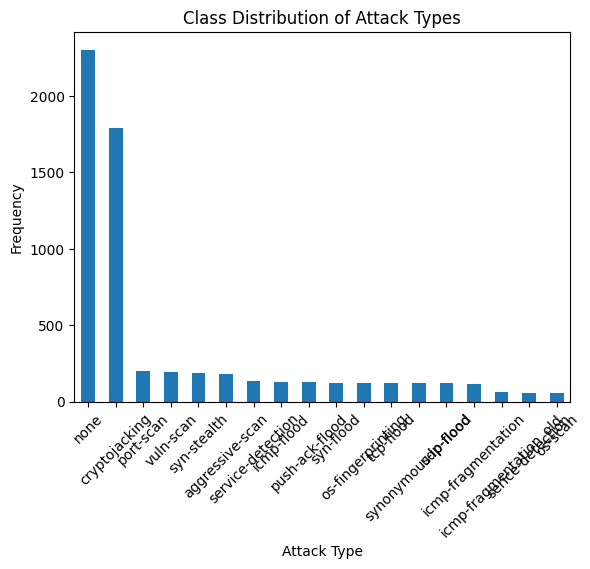

In [ ]:
df['Attack'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['Attack'].value_counts()

Attack
none                      2302
cryptojacking             1793
port-scan                  201
vuln-scan                  192
syn-stealth                189
aggressive-scan            182
service-detection          139
icmp-flood                 128
push-ack-flood             127
syn-flood                  126
os-fingerprinting          123
tcp-flood                  123
synonymous-ip-flood        122
udp-flood                  120
icmp-fragmentation         119
icmp-fragmentation_old      61
serice-detection            60
os-scan                     59
Name: count, dtype: int64

In [ ]:
attack_only_df = df[df['Label'] != 'benign'].copy()

In [ ]:
attack_only_df

time   ase_spec  block_block_bio_backmerge  block_block_bio_queue  \
0       5.001477  693371795                          0                      0   
1       5.001487  699964025                          0                      0   
2       5.001641  549770341                          0                      0   
3       5.003762  571970875                          0                      0   
4      10.065740  553199786                          0                      0   
...          ...        ...                        ...                    ...   
6161  283.646045    5463807                          0                      0   
6162  288.714173   10977108                          0                      0   
6163  293.790086    3683292                          0                      0   
6164  298.861925    5165840                          0                      0   
6165  300.505634    3909471                          0                      0   

      block_block_bio_remap  block_block_dirty_buffer  block_block_getrq  \
0                         0                         0                  0   
1                         0                         0                  0   
2                         0                         0                  0   
3                         0                         0                  0   
4                         0                         0                  0   
...                     ...                       ...                ...   
6161                      0                         0                  0   
6162                      0                         0                  0   
6163                      0                         0                  0   
6164                      0                         0                  0   
6165                      0                         0                  0   

      block_block_plug  block_block_rq_complete  block_block_rq_insert  ...  \
0                    0                        0                      0  ...   
1                    0                        0                      0  ...   
2                    0                        0                      0  ...   
3                    0                        0                      0  ...   
4                    0                        0                      0  ...   
...                ...                      ...                    ...  ...   
6161                 0                        0                      0  ...   
6162                 0                        0                      0  ...   
6163                 0                        0                      0  ...   
6164                 0                        0                      0  ...   
6165                 0                        0                      0  ...   

      vfp_spec  writeback_writeback_dirty_inode  \
0       215675                                0   
1        72029                                0   
2        87776                                0   
3       239473                                0   
4       186538                                0   
...        ...                              ...   
6161    828202                                0   
6162    337160                                0   
6163    151134                                0   
6164    314585                                0   
6165    309843                                0   

      writeback_writeback_dirty_inode_start  writeback_writeback_dirty_page  \
0                                         0                               0   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               0   
...                                     ...                             ...   
6161       

## Correlation of Attack


In [ ]:
#encoding attack column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
attack_only_df["Attack_encoded"] = le.fit_transform(attack_only_df["Attack"])

In [ ]:
#Keep only numeric columns
numeric_df = attack_only_df.select_dtypes(include=['int64', 'float64'])

# Compute correlation with encoded attack labels
corr_matrix = numeric_df.corrwith(attack_only_df["Attack_encoded"])
corr_matrix = corr_matrix.sort_values(ascending=False)

print(corr_matrix.head(15))   # top 15 positive correlations
print(corr_matrix.tail(15))   # top 15 negative correlations

Attack_encoded           1.000000
strex_fail_spec          0.455030
dsb_spec                 0.447970
exc_irq                  0.423174
ipi_ipi_entry            0.411754
ipi_ipi_exit             0.411754
ipi_ipi_raise            0.411706
l1d_cache_inval          0.402061
irq_irq_handler_entry    0.389296
irq_irq_handler_exit     0.389296
unaligned_st_spec        0.386775
skb_kfree_skb            0.382493
irq_softirq_raise        0.379168
irq_softirq_exit         0.378415
irq_softirq_entry        0.378415
dtype: float64
sched_sched_stat_runtime   -0.706530
ase_spec                   -0.711088
bus_access_not_shared      -0.711424
dTLB-store-misses          -0.711571
l1d_tlb_refill_wr          -0.711866
bus_access_normal          -0.712007
unaligned_ld_spec          -0.712733
bus_access                 -0.713361
l2d_cache_refill           -0.716681
node-loads                 -0.716863
bus_access_rd              -0.716962
l2d_cache_refill_rd        -0.716979
l2d_cache_wb               -0.7

In [ ]:
#Feature Correlation with {attack} all columns
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(14,6))
# sns.barplot(x=corr_matrix.index, y=corr_matrix.values, palette="coolwarm")
# plt.xticks(rotation=90)
# plt.title("Correlation of Numeric Features with Attack Types")
# plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in ["State", "Scenario", "Label", "interface"]:
    le = LabelEncoder()
    attack_only_df[col] = le.fit_transform(attack_only_df[col])

In [ ]:
#Keep only numeric columns
numeric_df = attack_only_df.select_dtypes(include=['int64', 'float64'])

# Compute correlation with encoded attack labels
corr_matrix = numeric_df.corrwith(attack_only_df["Attack_encoded"])
corr_matrix = corr_matrix.sort_values(ascending=False)

print(corr_matrix.head(15))   # top 15 positive correlations
print(corr_matrix.tail(15))   # top 15 negative correlations

Attack_encoded           1.000000
Scenario                 0.660561
interface                0.530939
strex_fail_spec          0.455030
dsb_spec                 0.447970
exc_irq                  0.423174
ipi_ipi_entry            0.411754
ipi_ipi_exit             0.411754
ipi_ipi_raise            0.411706
l1d_cache_inval          0.402061
irq_irq_handler_entry    0.389296
irq_irq_handler_exit     0.389296
unaligned_st_spec        0.386775
skb_kfree_skb            0.382493
irq_softirq_raise        0.379168
dtype: float64
ase_spec                -0.711088
bus_access_not_shared   -0.711424
dTLB-store-misses       -0.711571
l1d_tlb_refill_wr       -0.711866
bus_access_normal       -0.712007
unaligned_ld_spec       -0.712733
bus_access              -0.713361
l2d_cache_refill        -0.716681
node-loads              -0.716863
bus_access_rd           -0.716962
l2d_cache_refill_rd     -0.716979
l2d_cache_wb            -0.719293
l2d_cache_wb_victim     -0.719436
l2d_cache_refill_wr     -0.722107

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
#Feature Correlation with {attack} all columns
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(14,6))
# sns.barplot(x=corr_matrix.index, y=corr_matrix.values, palette="coolwarm")
# plt.xticks(rotation=90)
# plt.title("Correlation of Numeric Features with Attack Types")
# plt.show()

In [ ]:
#Feature Correlation with {attack} all columns
# Ensure only numeric columns are used for correlation
# numeric_df = attack_only_df.select_dtypes(include=['int64', 'float64'])

# # Loop through each attack type
# attack_types = attack_only_df["Attack"].unique()

# for attack in attack_types:
#     # Create binary target (1 = this attack, 0 = others)
#     binary_target = (attack_only_df["Attack"] == attack).astype(int)

#     # Correlation of numeric features with this binary target
#     corr = numeric_df.corrwith(binary_target).sort_values(ascending=False)

#     # Plot top 15 positive and negative correlations
#     plt.figure(figsize=(14,6))
#     sns.barplot(x=corr.index, y=corr.values, palette="coolwarm")
#     plt.xticks(rotation=90)
#     plt.title(f"Feature Correlation with {attack}")
#     plt.show()

##Heatmaps

In [ ]:
attack_only_df

time   ase_spec  block_block_bio_backmerge  block_block_bio_queue  \
0       5.001477  693371795                          0                      0   
1       5.001487  699964025                          0                      0   
2       5.001641  549770341                          0                      0   
3       5.003762  571970875                          0                      0   
4      10.065740  553199786                          0                      0   
...          ...        ...                        ...                    ...   
6161  283.646045    5463807                          0                      0   
6162  288.714173   10977108                          0                      0   
6163  293.790086    3683292                          0                      0   
6164  298.861925    5165840                          0                      0   
6165  300.505634    3909471                          0                      0   

      block_block_bio_remap  block_block_dirty_buffer  block_block_getrq  \
0                         0                         0                  0   
1                         0                         0                  0   
2                         0                         0                  0   
3                         0                         0                  0   
4                         0                         0                  0   
...                     ...                       ...                ...   
6161                      0                         0                  0   
6162                      0                         0                  0   
6163                      0                         0                  0   
6164                      0                         0                  0   
6165                      0                         0                  0   

      block_block_plug  block_block_rq_complete  block_block_rq_insert  ...  \
0                    0                        0                      0  ...   
1                    0                        0                      0  ...   
2                    0                        0                      0  ...   
3                    0                        0                      0  ...   
4                    0                        0                      0  ...   
...                ...                      ...                    ...  ...   
6161                 0                        0                      0  ...   
6162                 0                        0                      0  ...   
6163                 0                        0                      0  ...   
6164                 0                        0                      0  ...   
6165                 0                        0                      0  ...   

      writeback_writeback_dirty_inode_start  writeback_writeback_dirty_page  \
0                                         0                               0   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               0   
...                                     ...                             ...   
6161                                      0                               0   
6162                                      0                               0   
6163                                      0                               0   
6164                                      0                               0   
6165                                      0                               0   

      writeback_writeback_mark_inode_dirty  State               Attack  \
0                                        0      0        cryptojacking   
1                                        0      0        cryptojacking   
2     

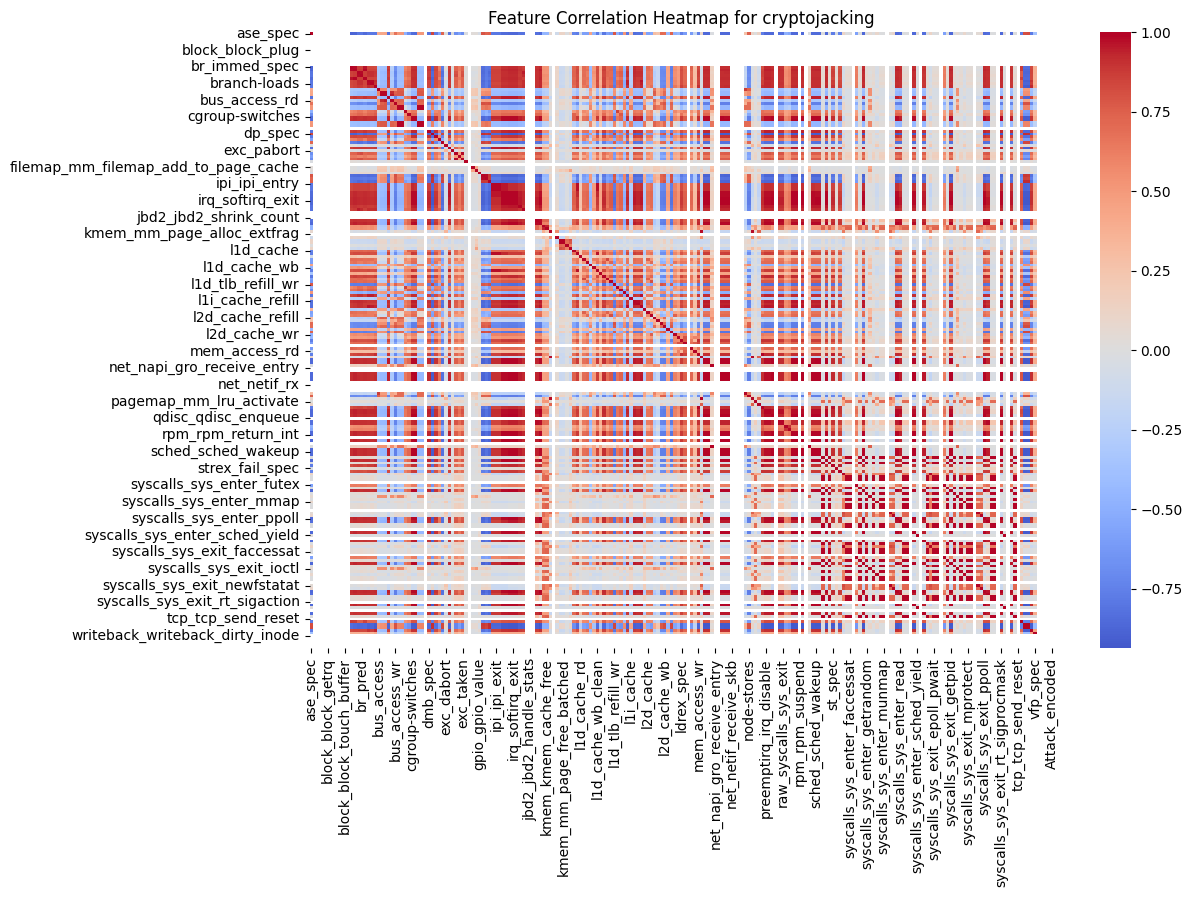

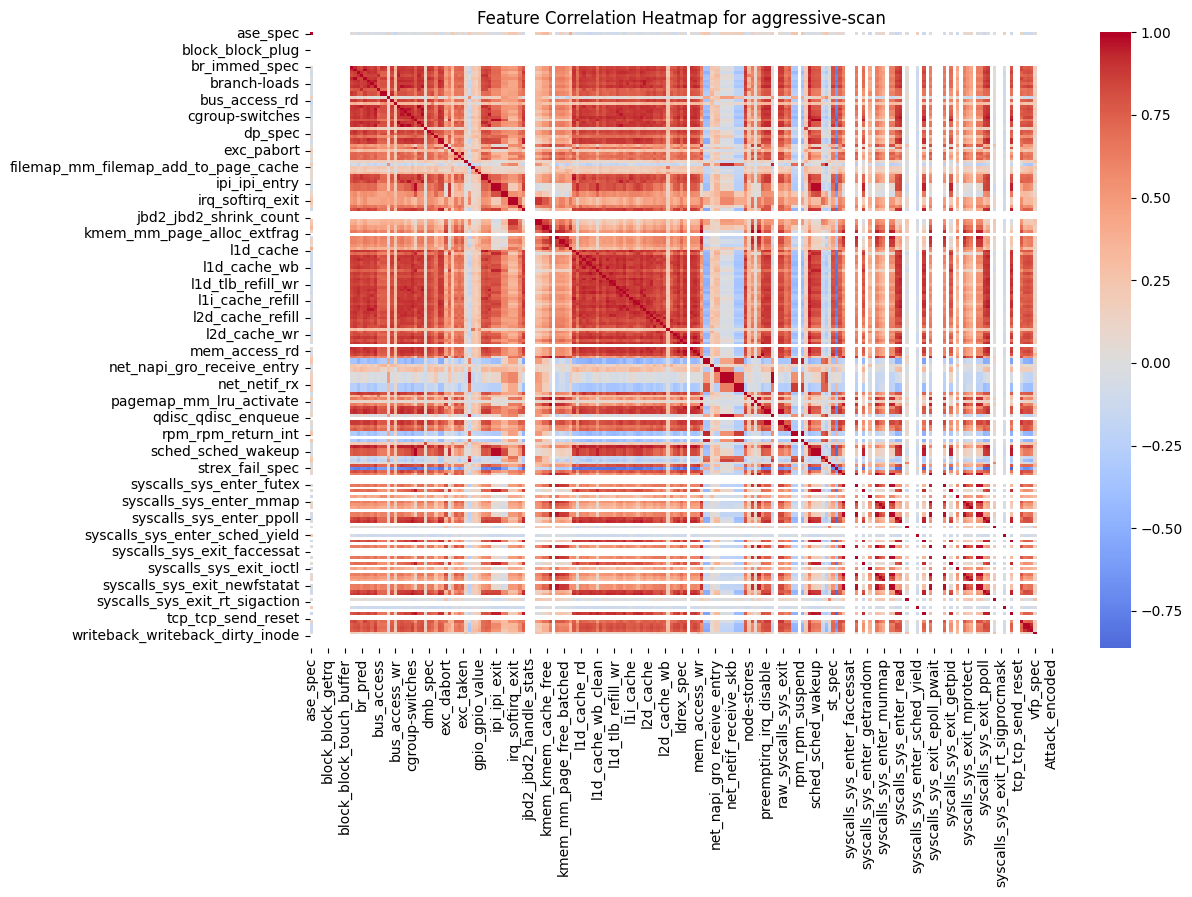

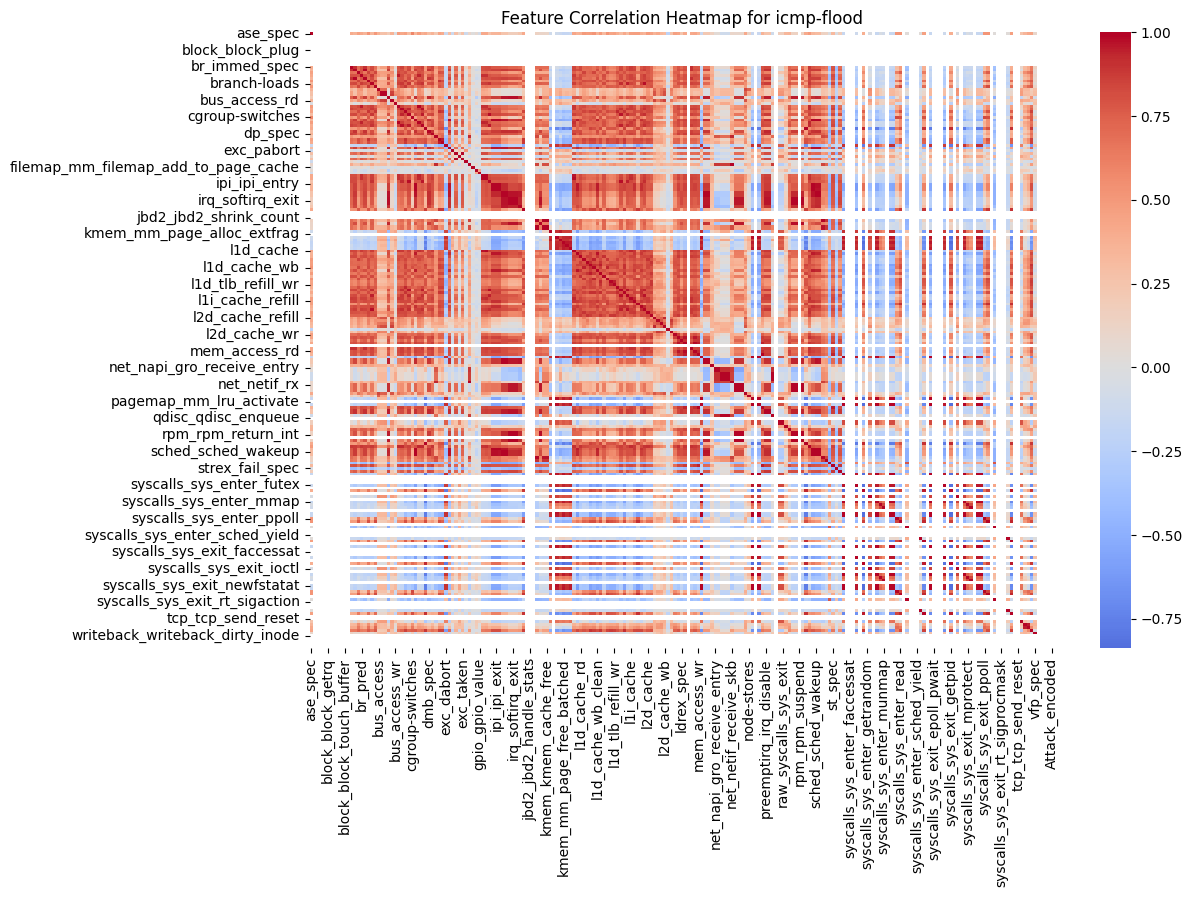

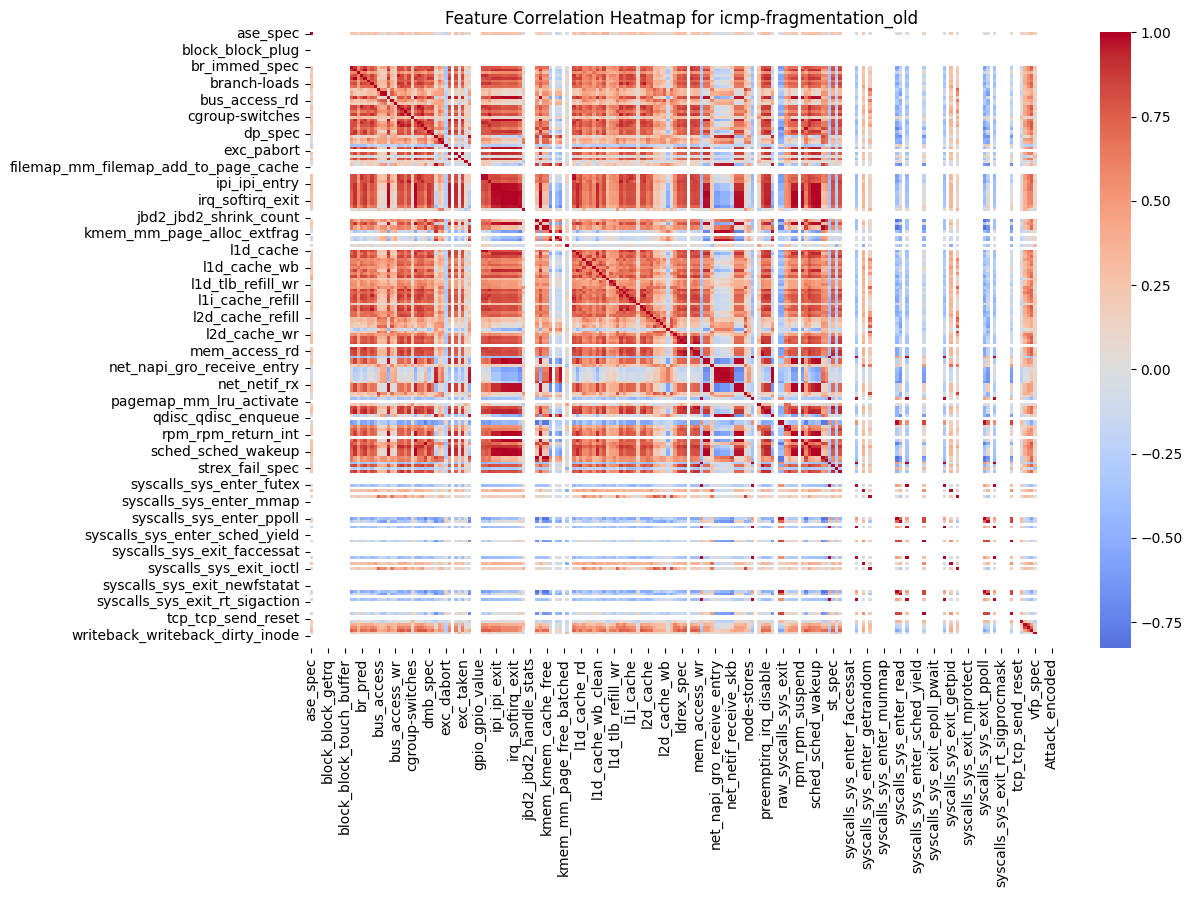

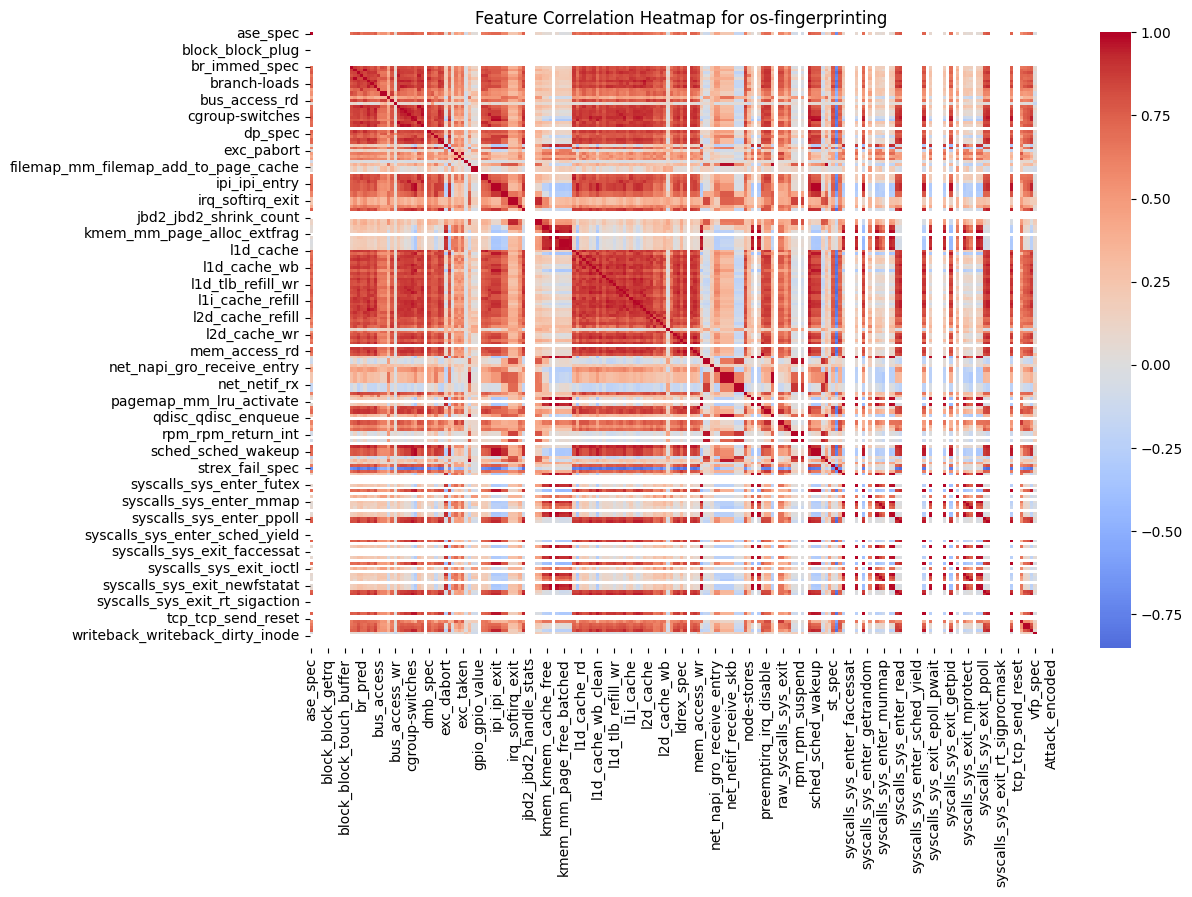

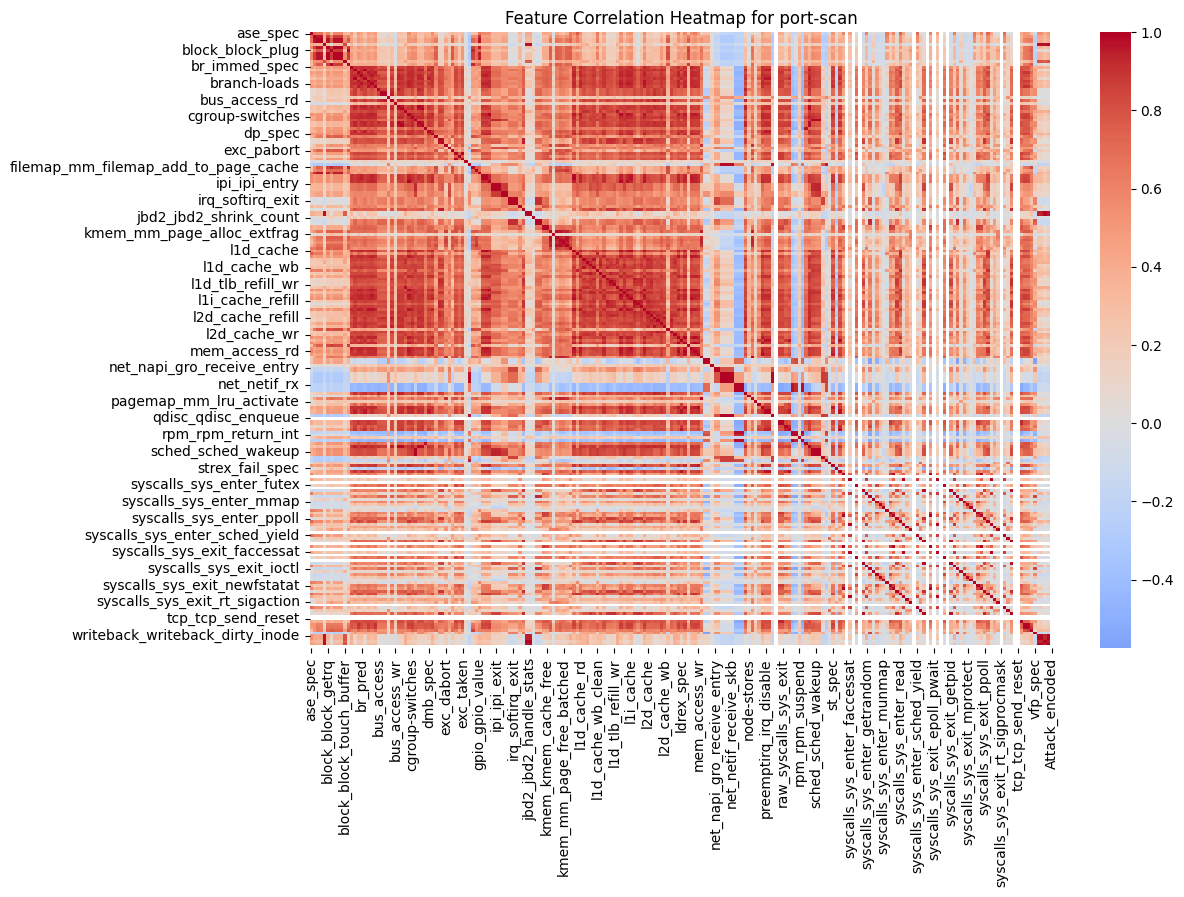

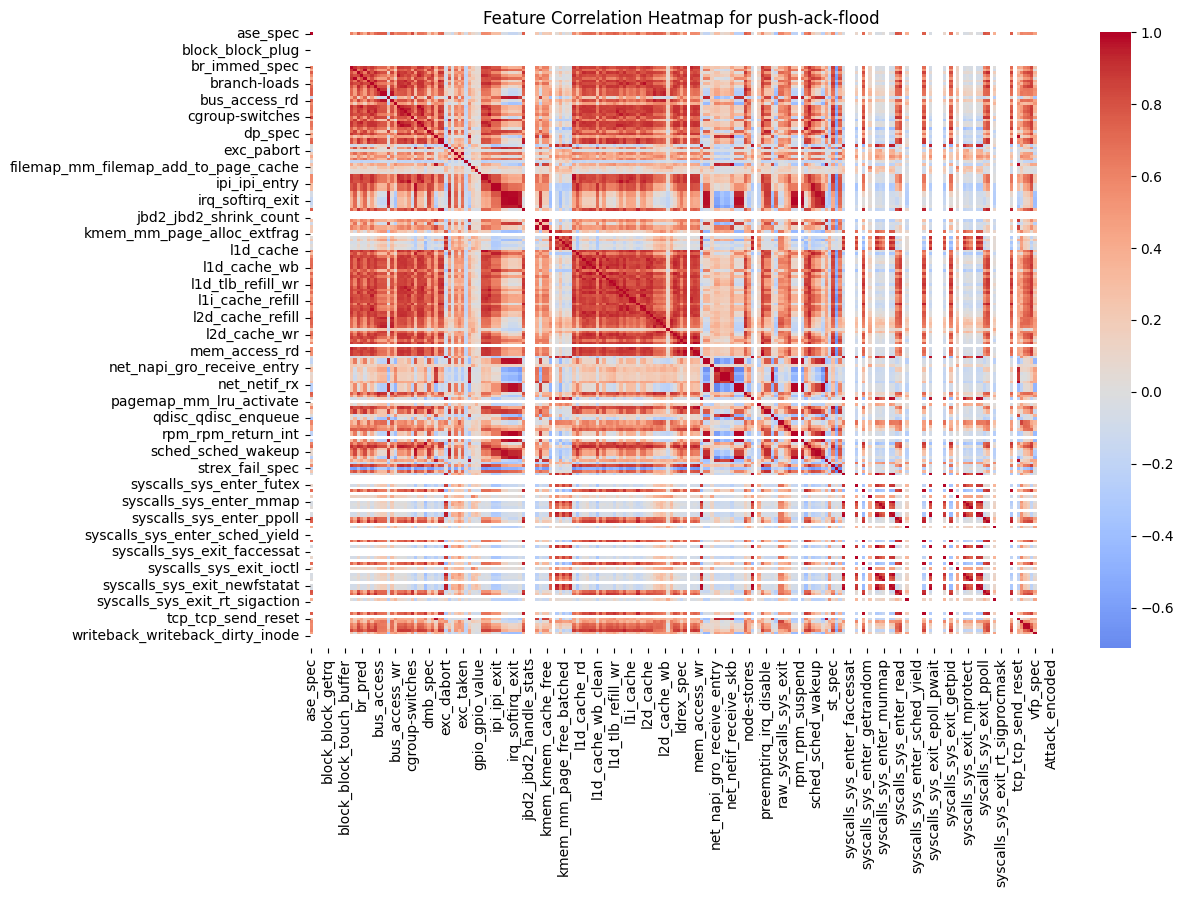

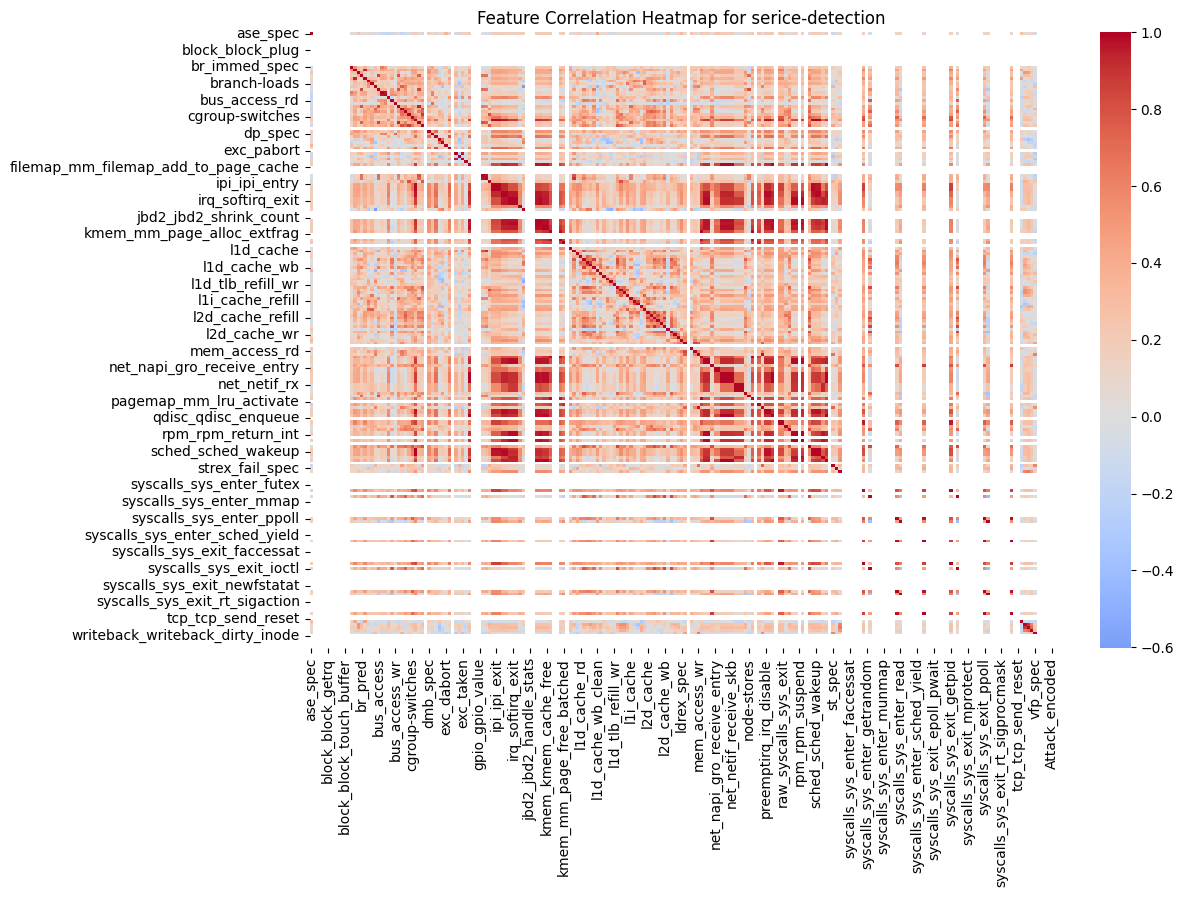

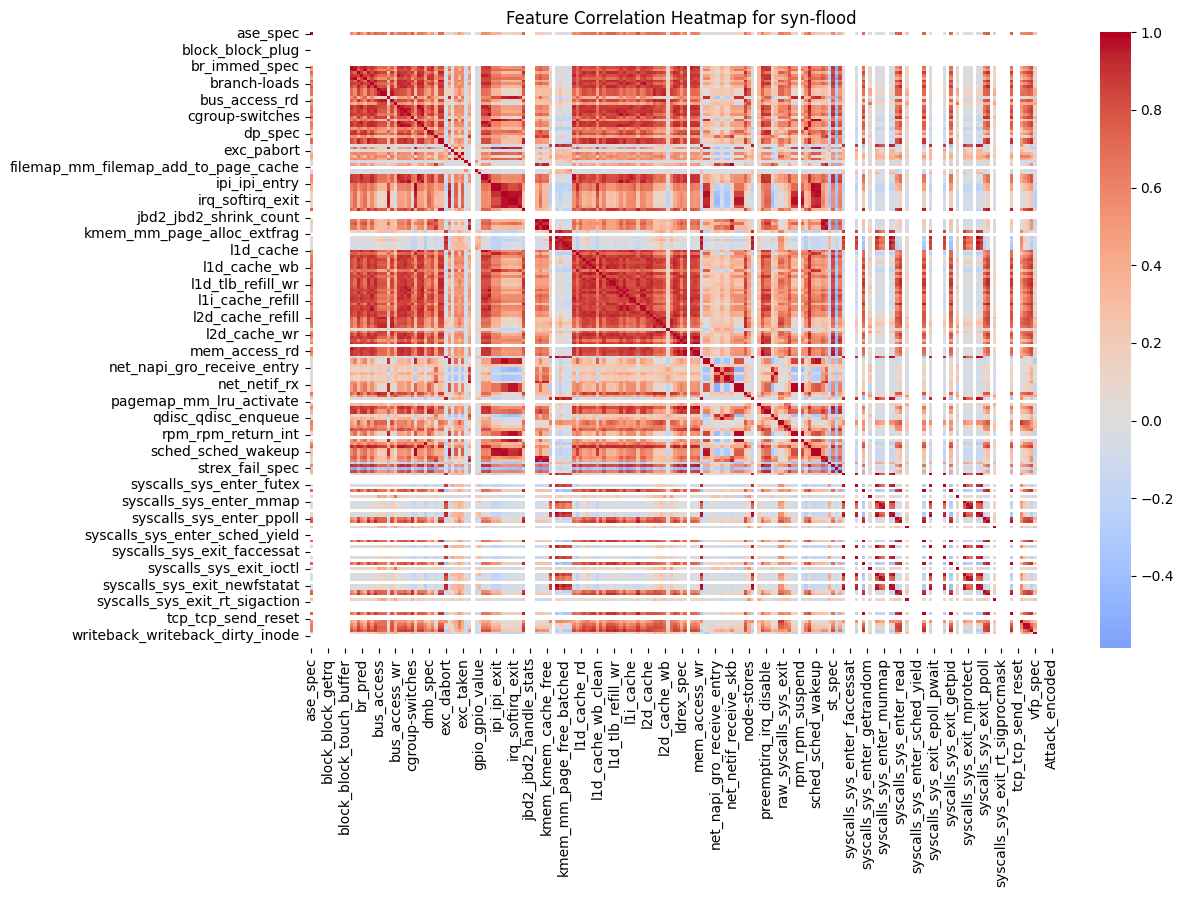

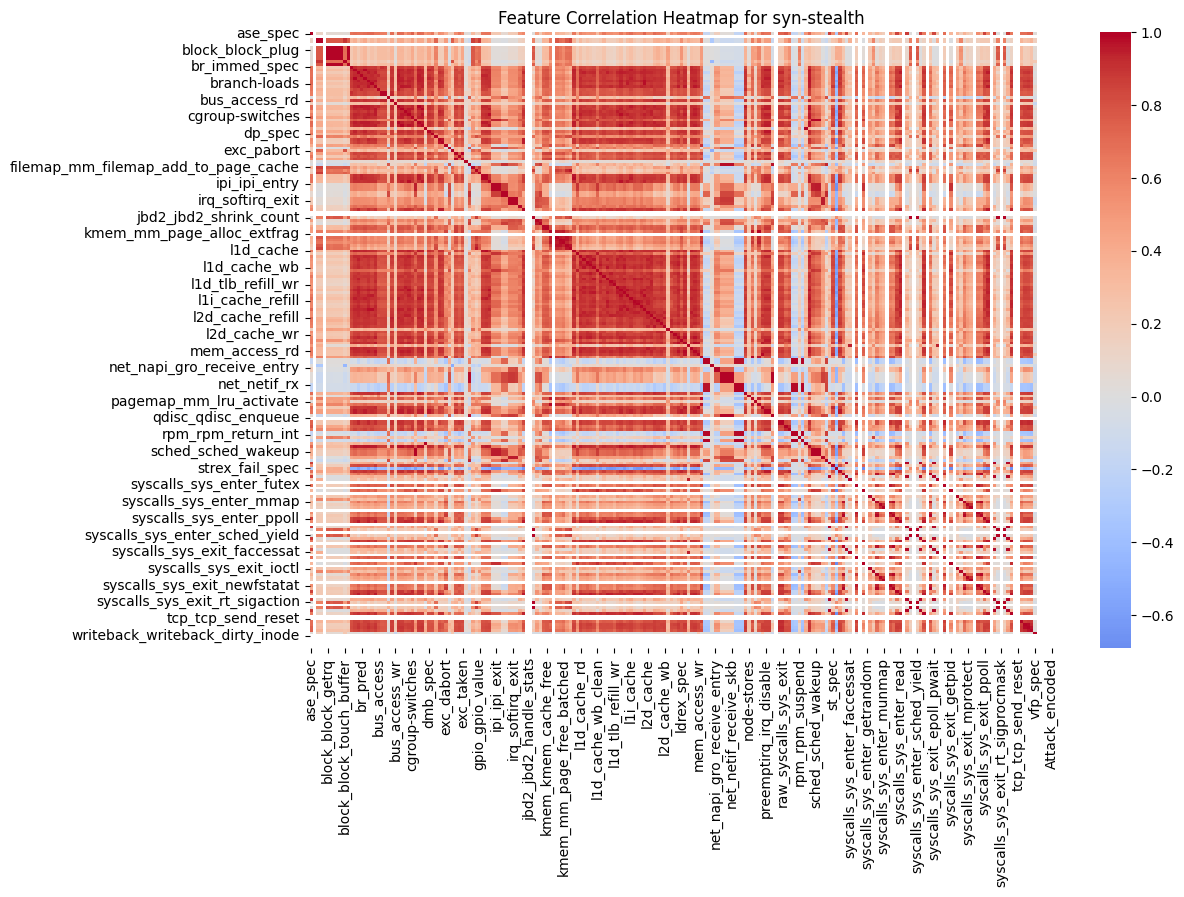

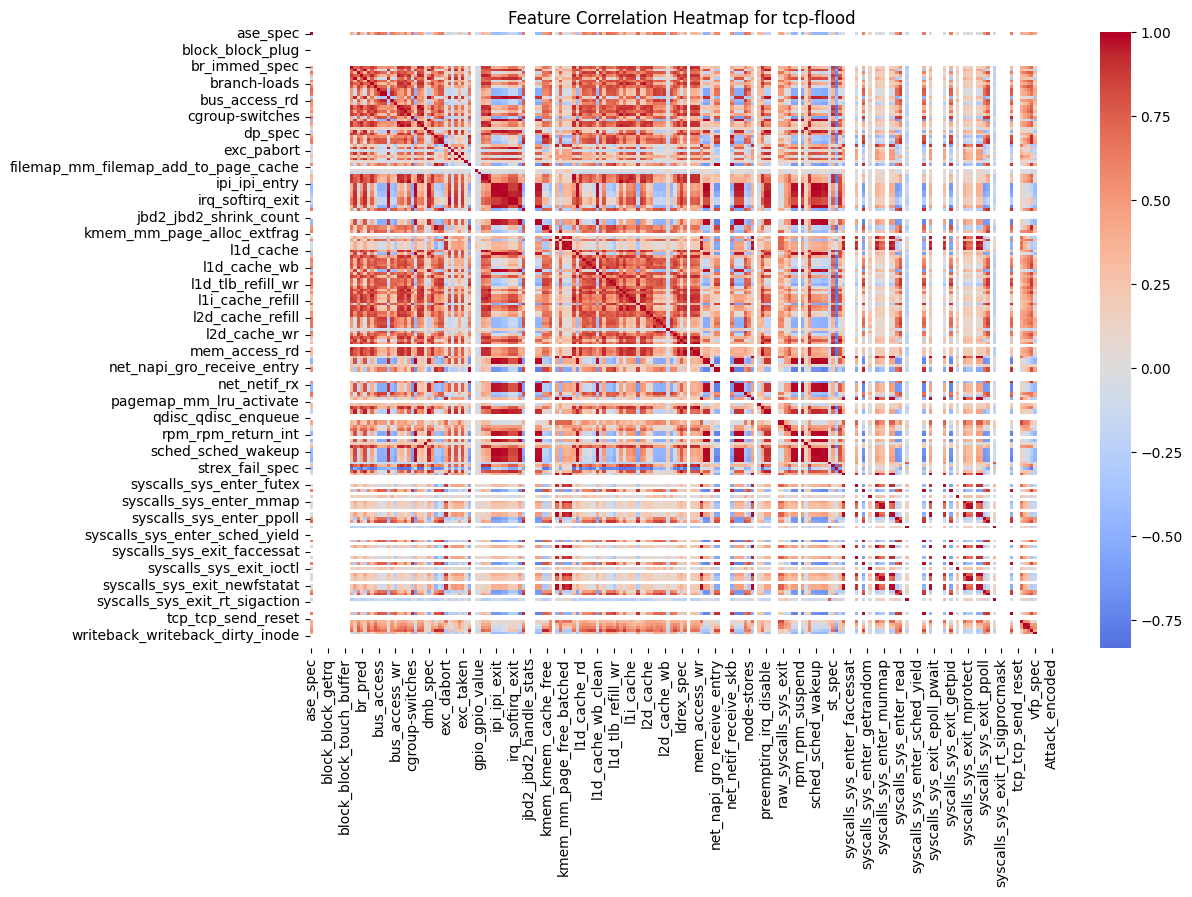

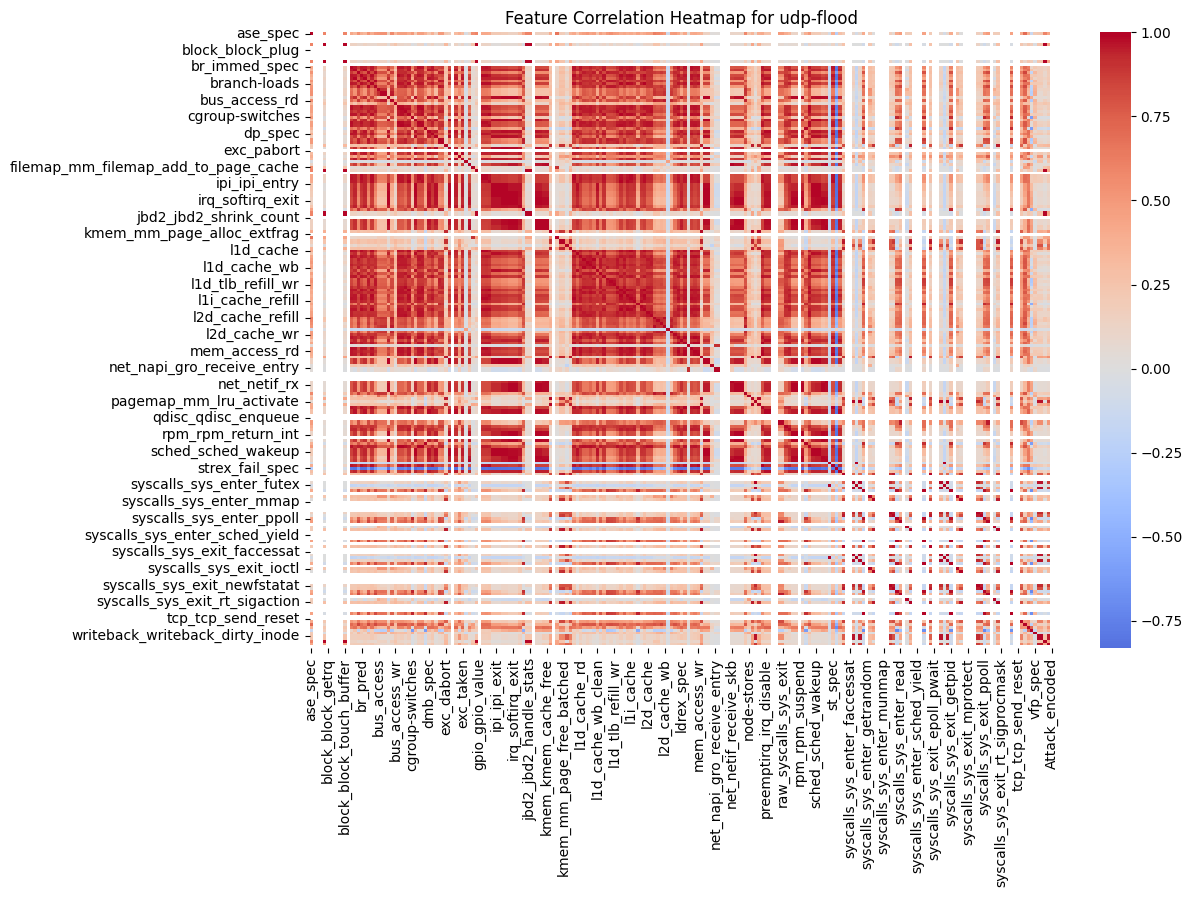

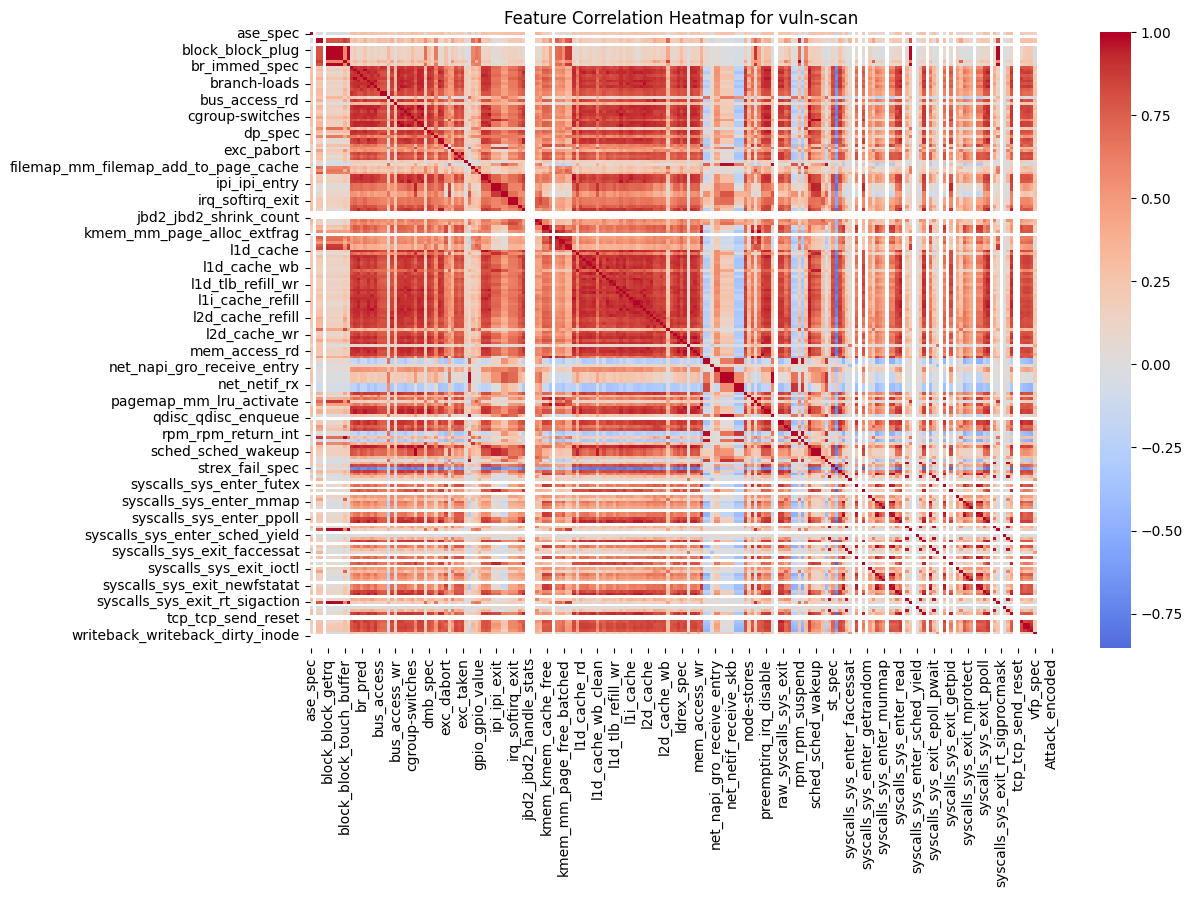

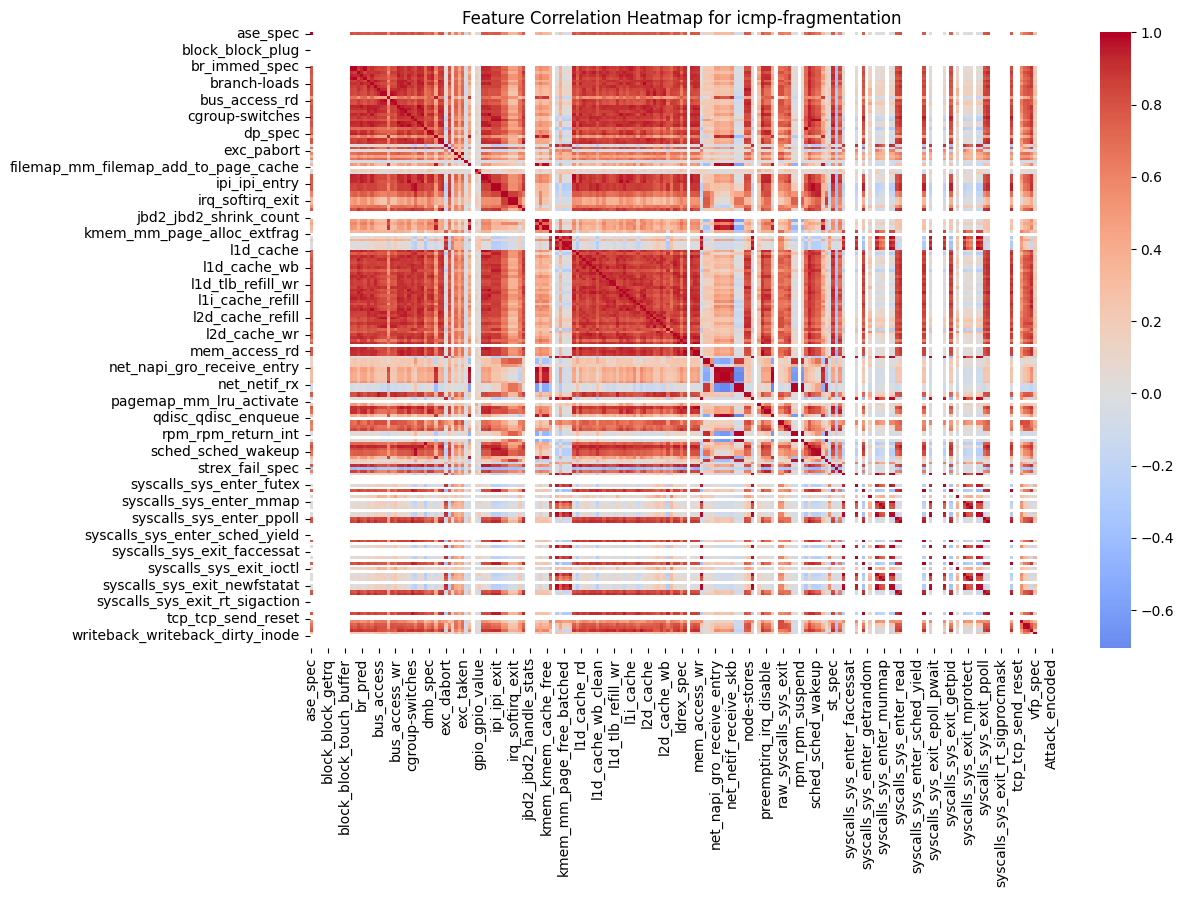

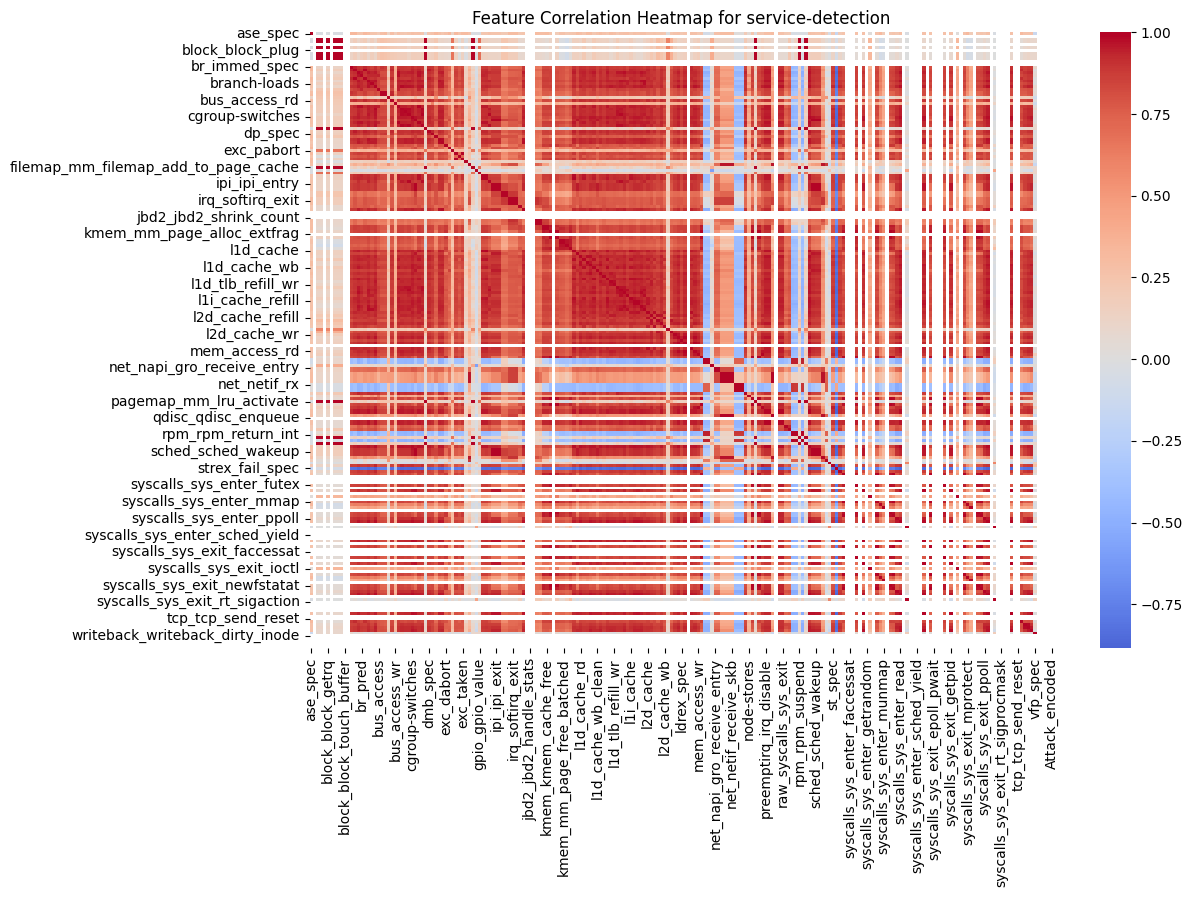

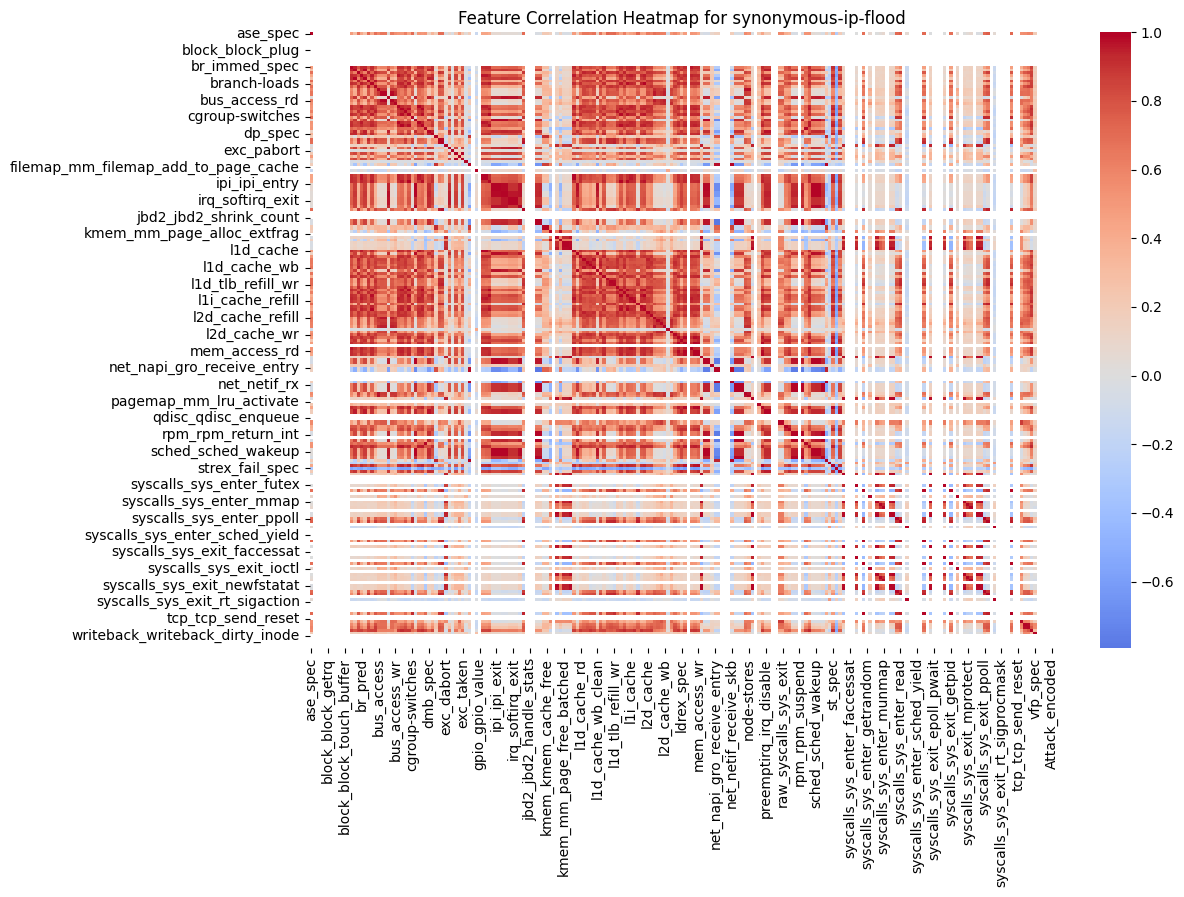

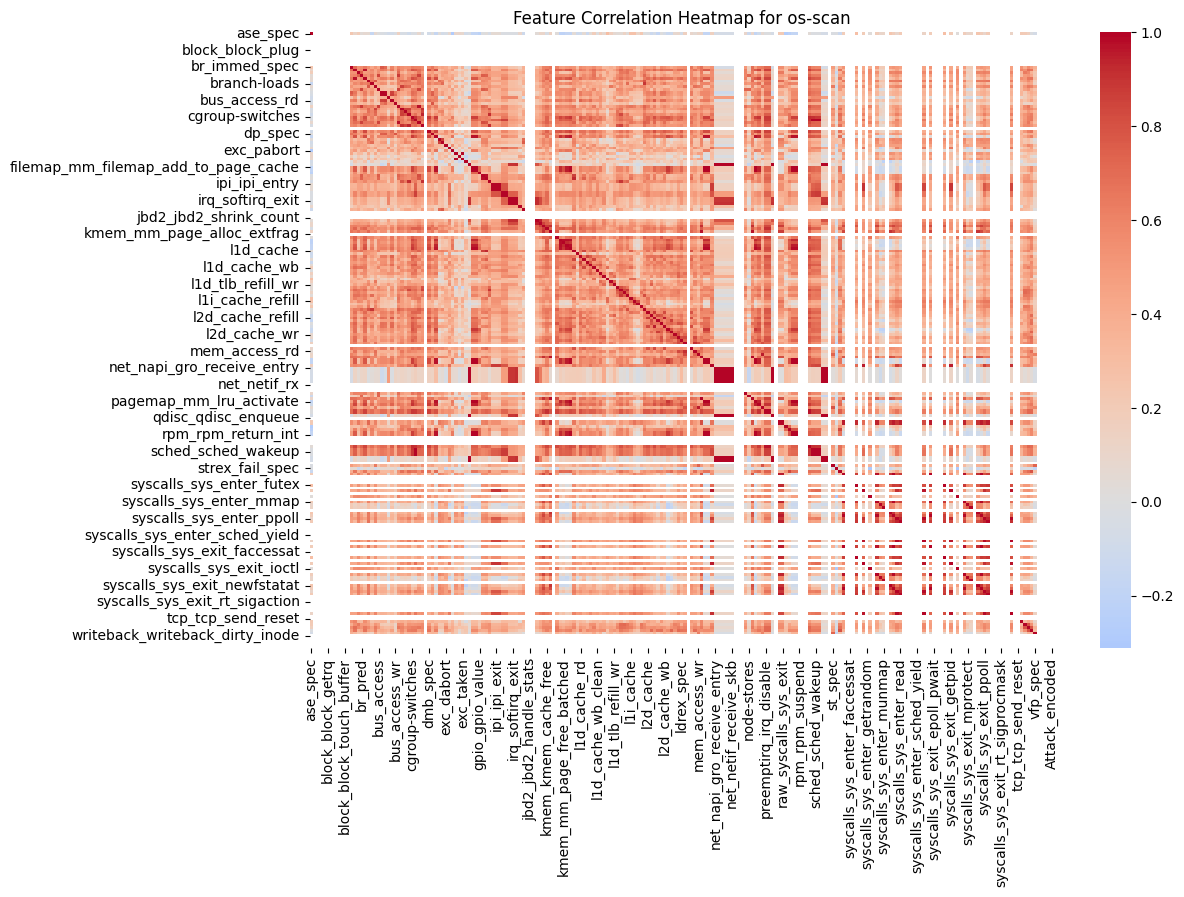

In [ ]:
# #creates heatmap of features based on attack (correlation)
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # List of categorical columns to drop
# drop_cols = ["Attack", "Scenario", "State", "Label", "interface"]

# # Unique attack types
# attack_types = attack_only_df["Attack"].unique()

# for attack in attack_ types:
#     # Subset data for one attack type
#     df_attack = attack_only_df[attack_only_df["Attack"] == attack].drop(columns=drop_cols, errors="ignore")

#     # Keep only numeric columns
#     df_attack = df_attack.select_dtypes(include=["int64", "float64"])

#     # Check if "time" column exists
#     if "time" in df_attack.columns:
#         # Optional: drop time if you don't want it in correlation
#         df_attack = df_attack.drop(columns=["time"])

#     # Compute correlation matrix
#     corr_matrix = df_attack.corr()

#     # Plot heatmap
#     plt.figure(figsize=(12, 8))
#     sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
#     plt.title(f"Feature Correlation Heatmap for {attack}")
#     plt.show()

In [ ]:
#done above. use this if above code block is not being used.
# List of categorical columns to drop
drop_cols = ["Attack", "Scenario", "State", "Label", "interface"]

In [ ]:
#Correlation with Attack top 10 positive or negative correlation
# Loop through each attack type
# for attack in attack_only_df["Attack"].unique():
#     print(f"\n===== Correlation with Attack: {attack} =====")

#     # Binary target: 1 if this attack, 0 otherwise
#     attack_only_df["is_attack"] = (attack_only_df["Attack"] == attack).astype(int)

#     # Keep only numeric features
#     df_num = attack_only_df.drop(columns=drop_cols, errors="ignore").select_dtypes(include=["int64", "float64"])

#     # Drop time column if not relevant
#     if "time" in df_num.columns:
#         df_num = df_num.drop(columns=["time"])

#     # Compute correlation with binary attack label
#     corr = df_num.corrwith(attack_only_df["is_attack"])

#     # Remove trivial correlation
#     corr = corr.drop("is_attack", errors="ignore")

#     # Sort correlations
#     corr_sorted = corr.sort_values(ascending=False)

#     # Print top positive and negative correlations
#     print("Top 10 positive correlations:")
#     print(corr_sorted.head(15), "\n")

#     print("Top 10 negative correlations:")
#     print(corr_sorted.tail(15))

#     print("="*60)

In [ ]:
#saves the correlations feature names into a csv file
# results = []

# for attack in attack_only_df["Attack"].unique():
#     attack_only_df["is_attack"] = (attack_only_df["Attack"] == attack).astype(int)

#     df_num = attack_only_df.drop(columns=drop_cols, errors="ignore").select_dtypes(include=["int64", "float64"])

#     if "time" in df_num.columns:
#         df_num = df_num.drop(columns=["time"])

#     corr = df_num.corrwith(attack_only_df["is_attack"])
#     corr = corr.drop("is_attack", errors="ignore")

#     # Get top 5 positive and top 5 negative
#     top_pos = corr.sort_values(ascending=False).head(5)
#     top_neg = corr.sort_values().head(5)

#     for feat, val in top_pos.items():
#         results.append({"attack": attack, "feature": feat, "correlation": val})
#     for feat, val in top_neg.items():
#         results.append({"attack": attack, "feature": feat, "correlation": val})

# # Convert to dataframe for easy view
# summary_df = pd.DataFrame(results)

# # Show top signature features per attack
# print(summary_df)

# # Optionally save to CSV
# summary_df.to_csv("attack_signature_features.csv", index=False)

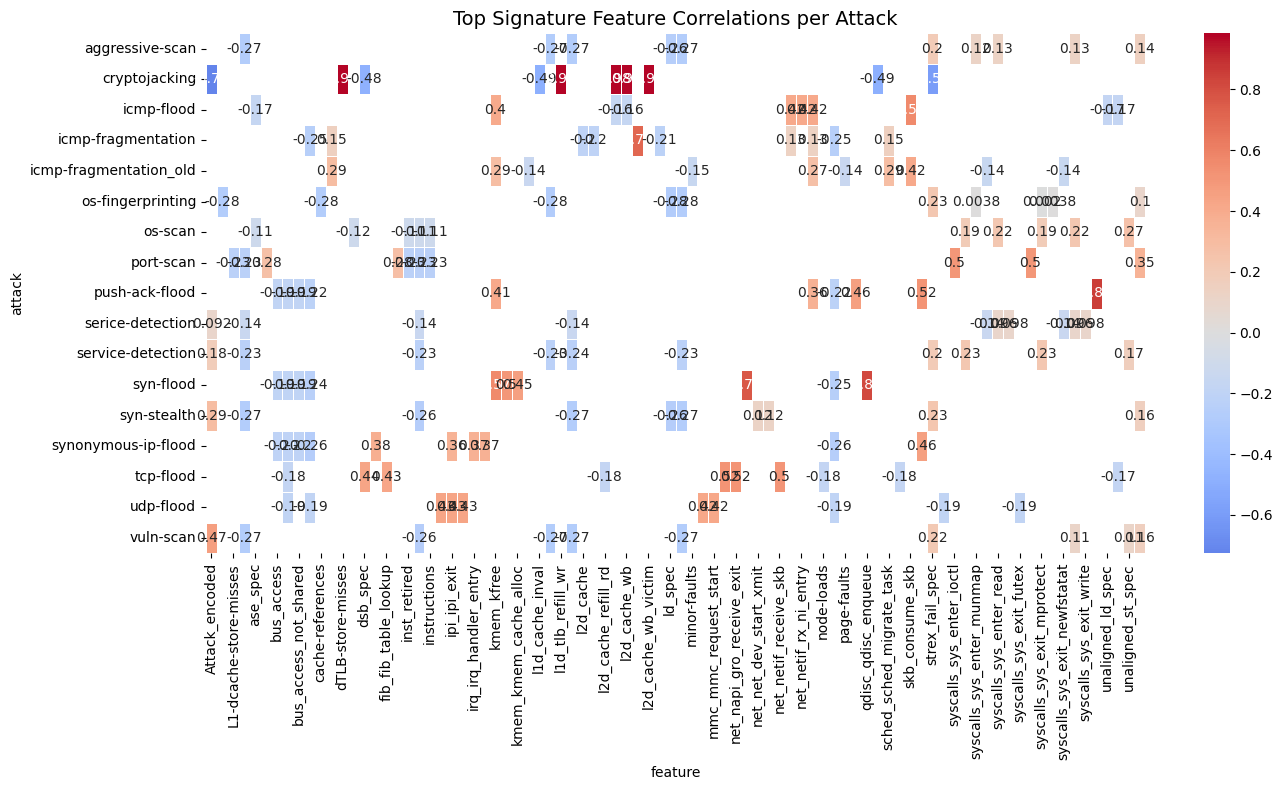

In [ ]:
results = []

for attack in attack_only_df["Attack"].unique():
    attack_only_df["is_attack"] = (attack_only_df["Attack"] == attack).astype(int)

    df_num = attack_only_df.drop(columns=drop_cols, errors="ignore").select_dtypes(include=["int64", "float64"])
    if "time" in df_num.columns:
        df_num = df_num.drop(columns=["time"])

    corr = df_num.corrwith(attack_only_df["is_attack"])
    corr = corr.drop("is_attack", errors="ignore")

    # Get top 5 positive and top 5 negative
    top_features = pd.concat([corr.sort_values(ascending=False).head(5),
                              corr.sort_values().head(5)])

    for feat, val in top_features.items():
        results.append({"attack": attack, "feature": feat, "correlation": val})

# Convert to DataFrame
summary_df = pd.DataFrame(results)

# Pivot for heatmap: attacks as rows, features as columns
heatmap_df = summary_df.pivot(index="attack", columns="feature", values="correlation")

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_df, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Top Signature Feature Correlations per Attack", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
#Most common features in all attacks
from collections import Counter

# Dictionary to hold feature lists
attack_features = {}

# Loop through each attack type again
common_features = []

for attack in attack_only_df["Attack"].unique():
    attack_only_df["is_attack"] = (attack_only_df["Attack"] == attack).astype(int)

    df_num = attack_only_df.drop(columns=drop_cols, errors="ignore").select_dtypes(include=["int64", "float64"])
    if "time" in df_num.columns:
        df_num = df_num.drop(columns=["time"])

    corr = df_num.corrwith(attack_only_df["is_attack"])
    corr = corr.drop("is_attack", errors="ignore")

    # Take top 10 positive and top 10 negative features
    top_pos = corr.sort_values(ascending=False).head(10).index.tolist()
    top_neg = corr.sort_values().head(10).index.tolist()

    selected = top_pos + top_neg
    attack_features[attack] = selected
    common_features.extend(selected)

# Count frequency of features across all attacks
feature_counts = Counter(common_features)

# Convert to DataFrame for readability
common_df = pd.DataFrame(feature_counts.most_common(), columns=["Feature", "Count"])

print("=== Most Common Features Across All Attacks ===")
print(common_df.head(20))  # Top 20 most frequent features

=== Most Common Features Across All Attacks ===
                      Feature  Count
0                    vfp_spec      8
1             L1-icache-loads      8
2                   l1i_cache      8
3                   inst_spec      7
4                inst_retired      7
5           bus_access_normal      7
6                l2d_cache_wb      6
7            l2d_cache_refill      6
8              Attack_encoded      6
9             strex_fail_spec      6
10  syscalls_sys_enter_munmap      6
11               l1d_cache_rd      6
12              mem_access_rd      6
13               instructions      6
14      bus_access_not_shared      6
15                 bus_access      6
16        l2d_cache_wb_victim      5
17              bus_access_rd      5
18                 node-loads      5
19               net_netif_rx      5


Interpreting the features in your results

vfp_spec

Likely refers to Vector Floating-Point speculative operations (ARM VFP unit).

High correlation: some attacks may trigger abnormal floating-point or speculative instruction usage.

L1-icache-loads, l1i_cache

First-level instruction cache loads/reads.

Attacks that repeatedly execute similar code patterns (e.g., DoS loops, cryptojacking miners) will show anomalies in instruction cache activity.

inst_spec, inst_retired, instructions

Instruction pipeline events: speculative instructions, retired instructions, total instructions executed.

These measure CPU workload patterns. For example, cryptojacking will have high instructions due to continuous hashing.

bus_access_normal, bus_access_rd, bus_access_not_shared, bus_access

Memory bus access events (read/write transactions on the SoC bus).

DoS floods and scanning may increase memory + bus pressure (packets processed rapidly).

l2d_cache_refill, l2d_cache_wb, l2d_cache_wb_victim

L2 data cache activity: refills, writebacks, evictions.

Attacks generating high memory churn (like SYN floods or cryptojacking) disturb cache behavior.

strex_fail_spec

Failed exclusive store (ARM synchronization primitive, part of load-linked/store-exclusive instructions).

This is often linked to atomic operations → might spike under parallel/multithreaded attack activity.

syscalls_sys_enter_munmap

Kernel system call: munmap() (memory unmapping).

May be abnormal if malware or scanning tools allocate/free memory aggressively.

l1d_cache_rd

L1 data cache reads.

Correlates with how memory-intensive an attack workload is.

mem_access_rd

General memory access reads.

Similar reasoning: attacks often create unusual read/write patterns.

node-loads, net_netif_rx

node-loads: possibly memory NUMA node loads.

net_netif_rx: network interface receive events (packets received).

These directly tie into network-based attacks (DoS, floods, scans).

Attack_encoded

That’s just your target encoding sneaking in. You should drop it from correlation analysis since it’s not a real system feature.

# Understanding Feature data distribution of Highly Correlated to an attack

##Cryptojacking

In [ ]:
dfcj=df.copy()

In [ ]:
dfcj

time   ase_spec  block_block_bio_backmerge  block_block_bio_queue  \
0       5.001477  693371795                          0                      0   
1       5.001487  699964025                          0                      0   
2       5.001641  549770341                          0                      0   
3       5.003762  571970875                          0                      0   
4      10.065740  553199786                          0                      0   
...          ...        ...                        ...                    ...   
6161  283.646045    5463807                          0                      0   
6162  288.714173   10977108                          0                      0   
6163  293.790086    3683292                          0                      0   
6164  298.861925    5165840                          0                      0   
6165  300.505634    3909471                          0                      0   

      block_block_bio_remap  block_block_dirty_buffer  block_block_getrq  \
0                         0                         0                  0   
1                         0                         0                  0   
2                         0                         0                  0   
3                         0                         0                  0   
4                         0                         0                  0   
...                     ...                       ...                ...   
6161                      0                         0                  0   
6162                      0                         0                  0   
6163                      0                         0                  0   
6164                      0                         0                  0   
6165                      0                         0                  0   

      block_block_plug  block_block_rq_complete  block_block_rq_insert  ...  \
0                    0                        0                      0  ...   
1                    0                        0                      0  ...   
2                    0                        0                      0  ...   
3                    0                        0                      0  ...   
4                    0                        0                      0  ...   
...                ...                      ...                    ...  ...   
6161                 0                        0                      0  ...   
6162                 0                        0                      0  ...   
6163                 0                        0                      0  ...   
6164                 0                        0                      0  ...   
6165                 0                        0                      0  ...   

      vfp_spec  writeback_writeback_dirty_inode  \
0       215675                                0   
1        72029                                0   
2        87776                                0   
3       239473                                0   
4       186538                                0   
...        ...                              ...   
6161    828202                                0   
6162    337160                                0   
6163    151134                                0   
6164    314585                                0   
6165    309843                                0   

      writeback_writeback_dirty_inode_start  writeback_writeback_dirty_page  \
0                                         0                               0   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               0   
...                                     ...                             ...   
6161       

In [ ]:
# Keep only cryptojacking attacks and benign samples
df_subset = dfcj[dfcj['Attack'].isin(['cryptojacking', 'none'])].copy()

# Encode labels: attack=1, benign=0
df_subset['Label_bin'] = df_subset['Label'].map({'attack': 1, 'benign': 0})

print(df_subset['Label'].value_counts())

Label
benign    2302
attack    1793
Name: count, dtype: int64


In [ ]:
df_subset

time   ase_spec  block_block_bio_backmerge  \
0        5.001477  693371795                          0   
1        5.001487  699964025                          0   
2        5.001641  549770341                          0   
3        5.003762  571970875                          0   
4       10.065740  553199786                          0   
...           ...        ...                        ...   
4090  5835.289450       2258                          0   
4091  5840.397454          0                          0   
4092  5845.501412     123314                          0   
4093  5850.569521      64210                          0   
4094  5855.669471      87906                          0   

      block_block_bio_queue  block_block_bio_remap  block_block_dirty_buffer  \
0                         0                      0                         0   
1                         0                      0                         0   
2                         0                      0                         0   
3                         0                      0                         0   
4                         0                      0                         0   
...                     ...                    ...                       ...   
4090                      0                      0                         0   
4091                      0                      0                         0   
4092                      0                      0                         0   
4093                      0                      0                         0   
4094                      0                      0                         0   

      block_block_getrq  block_block_plug  block_block_rq_complete  \
0                     0                 0                        0   
1                     0                 0                        0   
2                     0                 0                        0   
3                     0                 0                        0   
4                     0                 0                        0   
...                 ...               ...                      ...   
4090                  0                 0                        0   
4091                  0                 0                        0   
4092                  0                 0                        0   
4093                  0                 0                        0   
4094                  0                 0                        0   

      block_block_rq_insert  ...  writeback_writeback_dirty_inode  \
0                         0  ...                                0   
1                         0  ...                                0   
2                         0  ...                                0   
3                         0  ...                                0   
4                         0  ...                                0   
...                     ...  ...                              ...   
4090                      0  ...                                0   
4091                      0  ...                                0   
4092                      0  ...                                0   
4093                      0  ...                                0   
4094                      0  ...                                0   

      writeback_writeback_dirty_inode_start  writeback_writeback_dirty_page  \
0                                         0                               0   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               0   
...                                     ...                             ...   
4090                                      0                               0   
4091                                     

In [ ]:
# Select numeric columns and compute correlation with Label_bin
numeric_cols = df_subset.select_dtypes(include='number').columns
corr_with_label = df_subset[numeric_cols].corr()['Label_bin'].sort_values(ascending=False)

# Top positively correlated features (higher in attacks)
print("Top features positively correlated with attack:")
print(corr_with_label.head(15))

# Top negatively correlated features (higher in benign)
print("\nTop features negatively correlated with attack:")
print(corr_with_label.tail(15))

Top features positively correlated with attack:
Label_bin                1.000000
l2d_cache_refill_wr      0.989986
l2d_cache_wb_victim      0.989580
l2d_cache_wb             0.989368
node-stores              0.988519
bus_access_wr            0.988292
dp_spec                  0.987556
bus_access               0.987460
bus_access_normal        0.987412
bus_access_not_shared    0.987315
bus-cycles               0.986950
cpu-cycles               0.986924
bus_access_rd            0.986898
bus_cycles               0.986831
cpu_cycles               0.986827
Name: Label_bin, dtype: float64

Top features negatively correlated with attack:
qdisc_qdisc_enqueue                     NaN
rpm_rpm_suspend                         NaN
syscalls_sys_enter_fcntl                NaN
syscalls_sys_enter_nanosleep            NaN
syscalls_sys_enter_rt_sigaction         NaN
syscalls_sys_enter_sendmsg              NaN
syscalls_sys_exit_fcntl                 NaN
syscalls_sys_exit_nanosleep             NaN
syscalls_

In [ ]:
# a box plot representing the data of top features selected based on correlation to attack cryptojacking
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Pick top 5 features by absolute correlation
# top_features = corr_with_label.abs().sort_values(ascending=False).head(10).index.drop("Label_bin")

# plt.figure(figsize=(18,12))
# for i, feat in enumerate(top_features, 1):
#     plt.subplot(4,3,i)  # 4 rows × 3 columns = 12 subplots, enough for 10 features
#     sns.boxplot(x='Label', y=feat, data=df_subset)
#     plt.title(f"{feat} by Label")
# plt.tight_layout()
# plt.show()

In [ ]:
#done above use this if not using the above block code.
# Pick top 5 features by absolute correlation
top_features = corr_with_label.abs().sort_values(ascending=False).head(10).index.drop("Label_bin")

In [ ]:
# a line plot representing the distribution of data of top features selected based on correlation to attack cryptojacking
# for feat in top_features:
#     plt.figure(figsize=(12,6))
#     sns.lineplot(data=df_subset.reset_index(), x=df_subset.reset_index().index, y=feat, hue="Label")
#     plt.title(f"{feat} across samples (Attack vs Benign)")
#     plt.show()

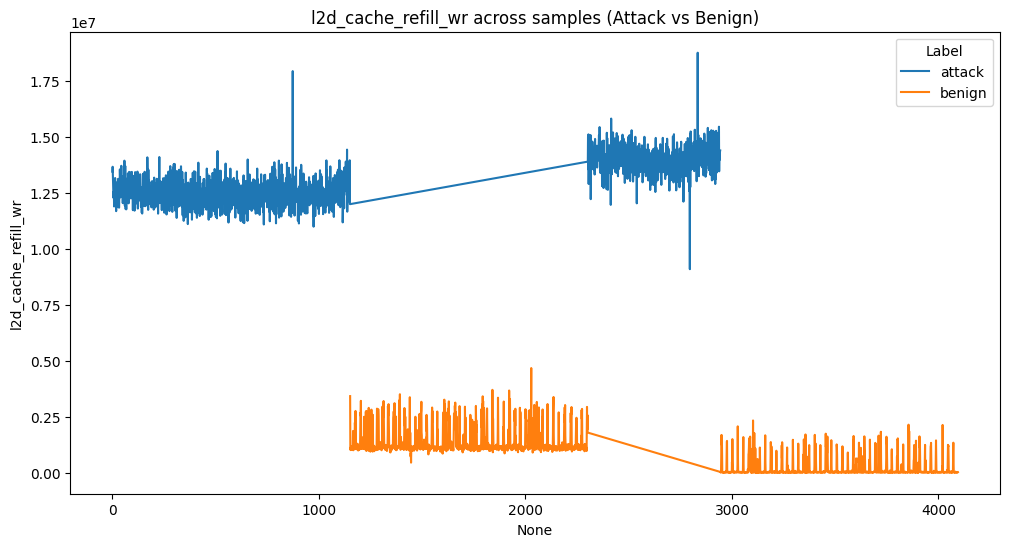

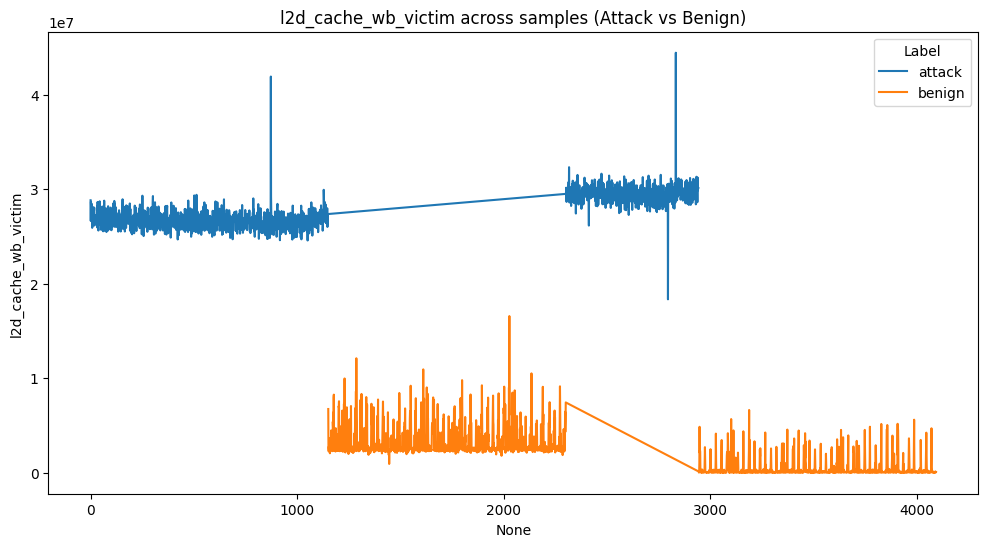

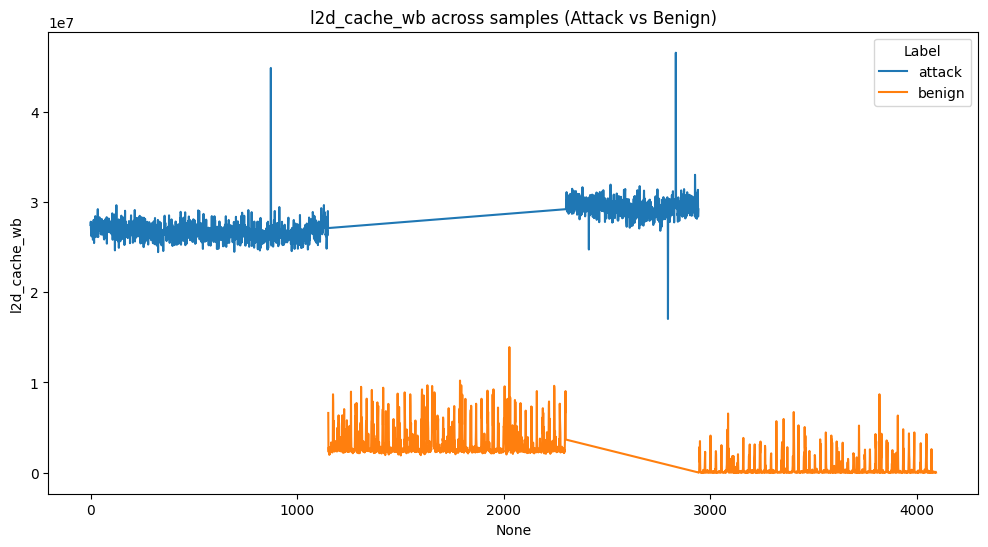

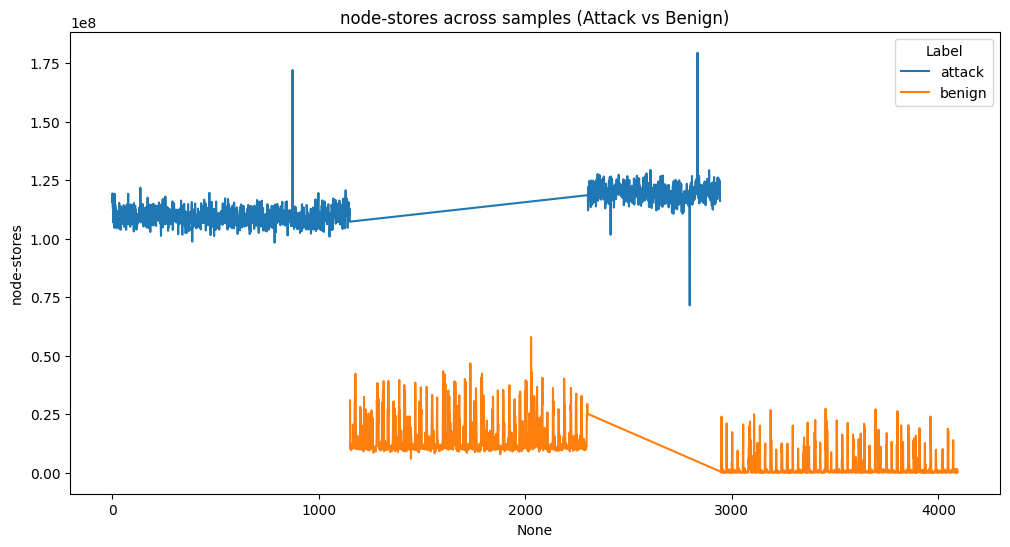

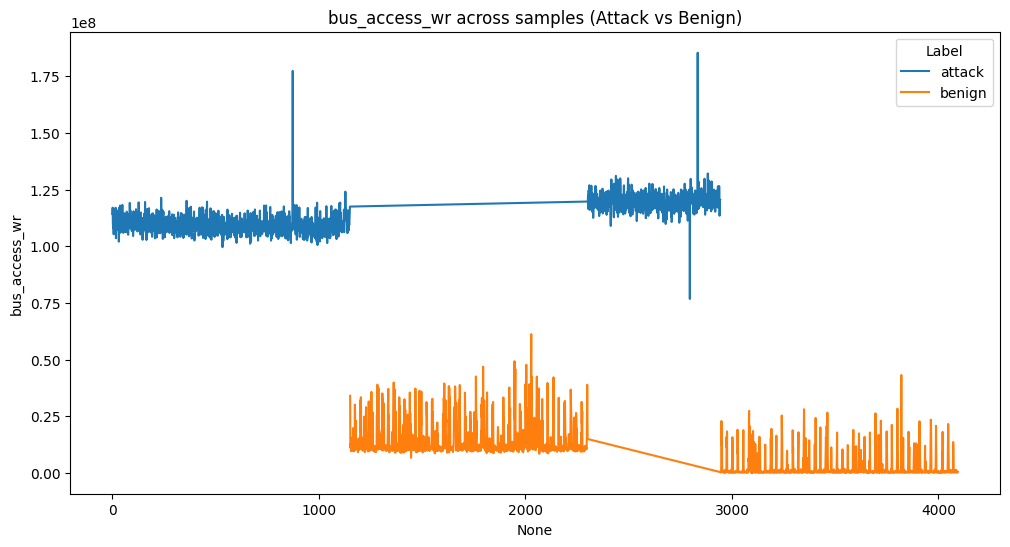

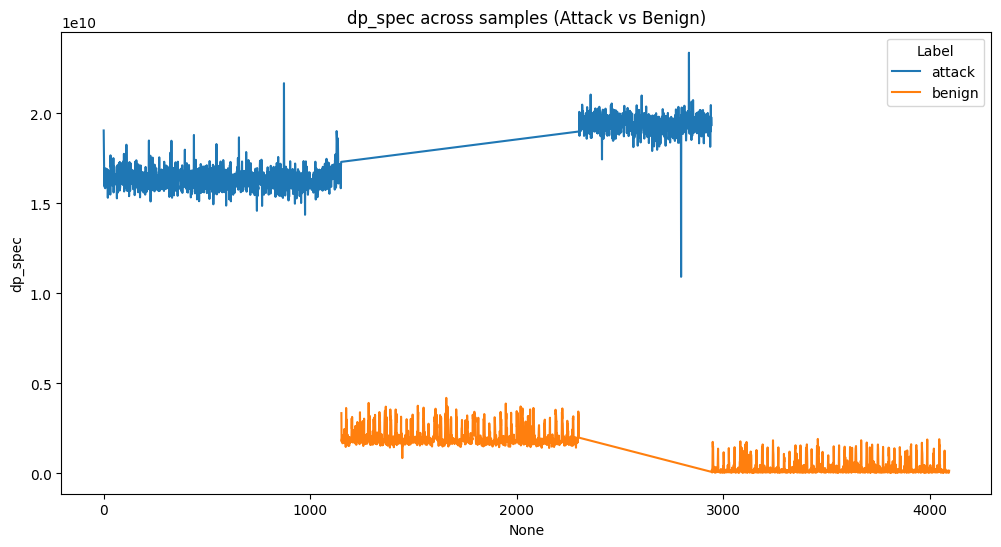

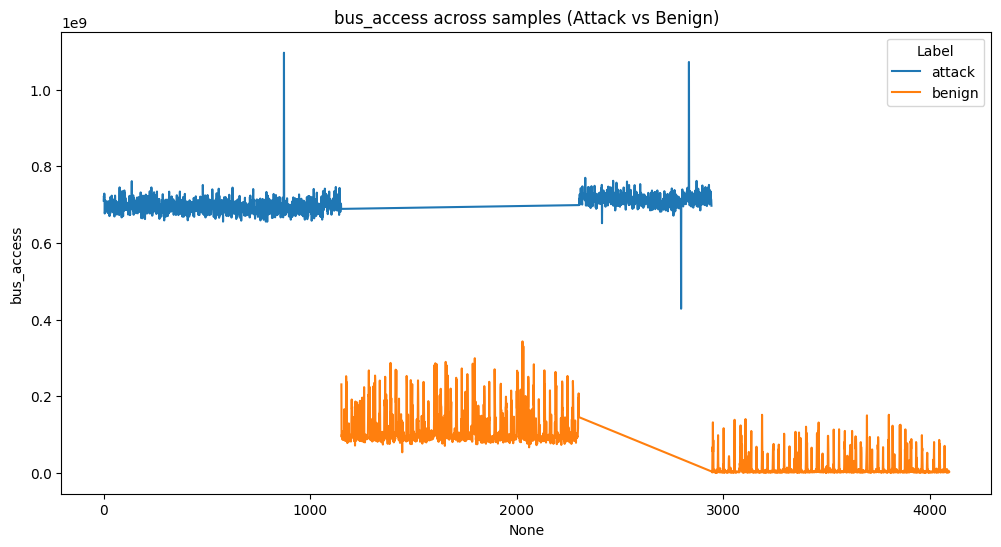

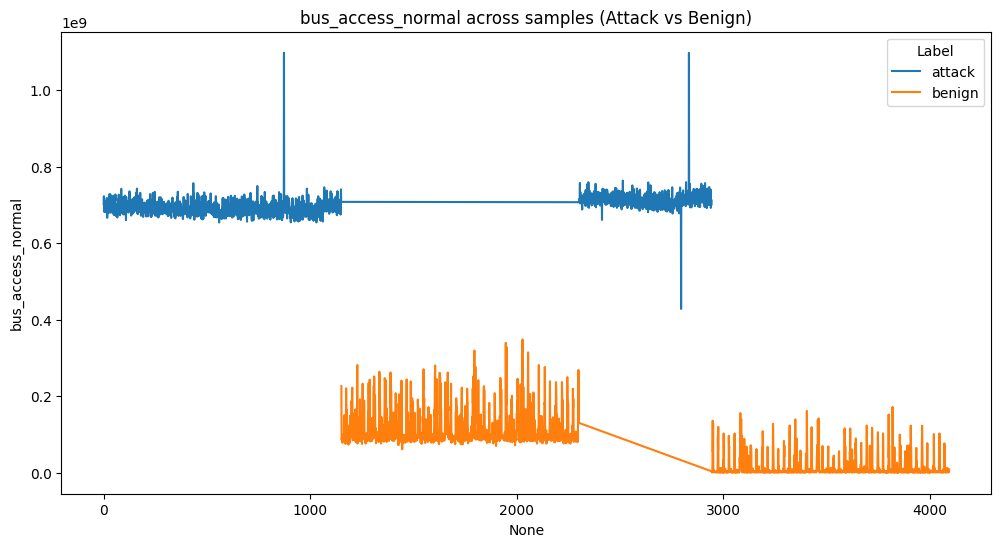

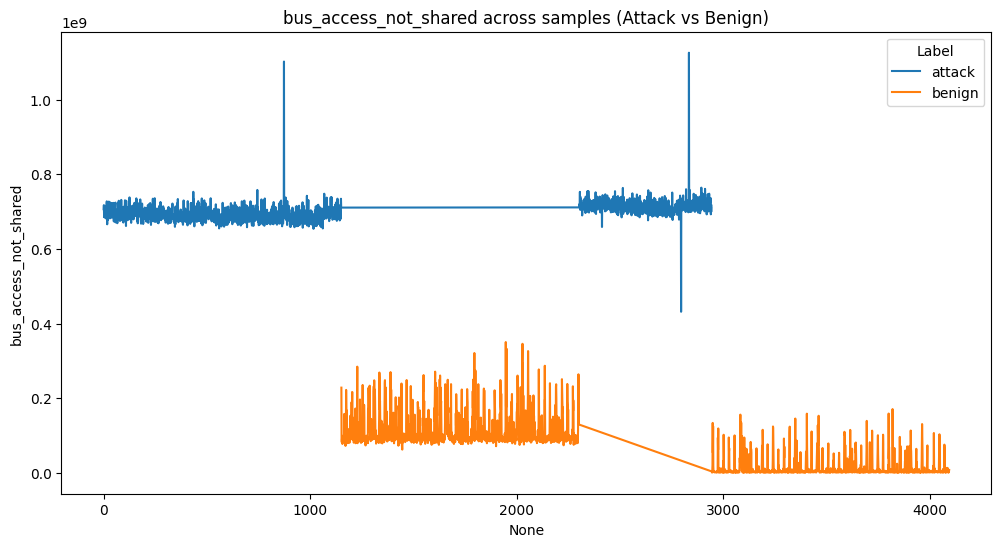

In [ ]:
## a line plot representing the distribution of data of top features selected based on correlation to attack cryptojacking
for feat in top_features:
    plt.figure(figsize=(12,6))
    sns.lineplot(data=df_subset.reset_index(), x=df_subset.reset_index().index, y=feat, hue='Label')
    plt.title(f"{feat} across samples (Attack vs Benign)")
    plt.show()

In [ ]:
## autocorrelation plot representing the distribution of data of top features selected based on correlation to attack cryptojacking
# from pandas.plotting import autocorrelation_plot

# for feat in top_features:
#     plt.figure(figsize=(8,4))
#     autocorrelation_plot(df_subset[feat])
#     plt.title(f"Autocorrelation for {feat}")
#     plt.show()

In [ ]:
# #download non zero features of Kernel Dataset.
# from google.colab import files

# # Save DataFrame as CSV
# df.to_csv("Kernel_dataset.csv", index=False)

# # Download the file
# files.download("Kernel_dataset.csv")

## tcp-flood

In [ ]:
dftcp=df.copy()

In [ ]:
dftcp


time   ase_spec  block_block_bio_backmerge  block_block_bio_queue  \
0       5.001477  693371795                          0                      0   
1       5.001487  699964025                          0                      0   
2       5.001641  549770341                          0                      0   
3       5.003762  571970875                          0                      0   
4      10.065740  553199786                          0                      0   
...          ...        ...                        ...                    ...   
6161  283.646045    5463807                          0                      0   
6162  288.714173   10977108                          0                      0   
6163  293.790086    3683292                          0                      0   
6164  298.861925    5165840                          0                      0   
6165  300.505634    3909471                          0                      0   

      block_block_bio_remap  block_block_dirty_buffer  block_block_getrq  \
0                         0                         0                  0   
1                         0                         0                  0   
2                         0                         0                  0   
3                         0                         0                  0   
4                         0                         0                  0   
...                     ...                       ...                ...   
6161                      0                         0                  0   
6162                      0                         0                  0   
6163                      0                         0                  0   
6164                      0                         0                  0   
6165                      0                         0                  0   

      block_block_plug  block_block_rq_complete  block_block_rq_insert  ...  \
0                    0                        0                      0  ...   
1                    0                        0                      0  ...   
2                    0                        0                      0  ...   
3                    0                        0                      0  ...   
4                    0                        0                      0  ...   
...                ...                      ...                    ...  ...   
6161                 0                        0                      0  ...   
6162                 0                        0                      0  ...   
6163                 0                        0                      0  ...   
6164                 0                        0                      0  ...   
6165                 0                        0                      0  ...   

      vfp_spec  writeback_writeback_dirty_inode  \
0       215675                                0   
1        72029                                0   
2        87776                                0   
3       239473                                0   
4       186538                                0   
...        ...                              ...   
6161    828202                                0   
6162    337160                                0   
6163    151134                                0   
6164    314585                                0   
6165    309843                                0   

      writeback_writeback_dirty_inode_start  writeback_writeback_dirty_page  \
0                                         0                               0   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               0   
...                                     ...                             ...   
6161       

In [ ]:
# Keep only tcp_flood attacks and benign samples
df_subset = dfcj[dfcj['Attack'].isin(['tcp-flood', 'none'])].copy()

# Encode labels: attack=1, benign=0
df_subset['Label_bin'] = df_subset['Label'].map({'attack': 1, 'benign': 0})

# Display label distribution
print(df_subset['Label'].value_counts())


Label
benign    2302
attack     123
Name: count, dtype: int64


In [ ]:
df_subset

time  ase_spec  block_block_bio_backmerge  block_block_bio_queue  \
1151  1462.737567   9908255                          0                      0   
1152  1464.053439   5064815                          0                      0   
1153  1464.703733   6024783                          0                      0   
1154  1465.629621   6840242                          0                      0   
1155  1467.805544   6617851                          0                      0   
...           ...       ...                        ...                    ...   
5563   288.729531   1517917                          0                      0   
5564   293.801455   3442132                          0                      0   
5565   298.869406    284009                          0                      0   
5566   303.929470     46699                          0                      0   
5567   307.241893    581537                          0                      0   

      block_block_bio_remap  block_block_dirty_buffer  block_block_getrq  \
1151                      0                         0                  0   
1152                      0                         0                  0   
1153                      0                         0                  0   
1154                      0                         0                  0   
1155                      0                         0                  0   
...                     ...                       ...                ...   
5563                      0                         0                  0   
5564                      0                         0                  0   
5565                      0                         0                  0   
5566                      0                         0                  0   
5567                      0                         0                  0   

      block_block_plug  block_block_rq_complete  block_block_rq_insert  ...  \
1151                 0                        0                      0  ...   
1152                 0                        0                      0  ...   
1153                 0                        0                      0  ...   
1154                 0                        0                      0  ...   
1155                 0                        0                      0  ...   
...                ...                      ...                    ...  ...   
5563                 0                        0                      0  ...   
5564                 0                        0                      0  ...   
5565                 0                        0                      0  ...   
5566                 0                        0                      0  ...   
5567                 0                        0                      0  ...   

      writeback_writeback_dirty_inode  writeback_writeback_dirty_inode_start  \
1151                                0                                      0   
1152                                0                                      0   
1153                                0                                      0   
1154                                0                                      0   
1155                                0                                      0   
...                               ...                                    ...   
5563                                0                                      0   
5564                                0                                      0   
5565                                0                                      0   
5566                                0                                      0   
5567                                0                                      0   

      writeback_writeback_dirty_page  writeback_writeback_mark_inode_dirty  \
1151                               0                                     0   
1152                               0                         

In [ ]:
# Select numeric columns and compute correlation with Label_bin
numeric_cols = df_subset.select_dtypes(include='number').columns
corr_with_label = df_subset[numeric_cols].corr()['Label_bin'].sort_values(ascending=False)

# Top positively correlated features (higher in tcp_flood attacks)
print("Top features positively correlated with attack (tcp_flood):")
print(corr_with_label.head(15))

# Top negatively correlated features (higher in benign samples)
print("\nTop features negatively correlated with attack (tcp_flood):")
print(corr_with_label.tail(15))


Top features positively correlated with attack (tcp_flood):
Label_bin                     1.000000
kmem_kmem_cache_free          0.873301
kmem_kmem_cache_alloc         0.873081
irq_softirq_exit              0.848022
irq_softirq_entry             0.848022
irq_softirq_raise             0.847980
dsb_spec                      0.798639
net_netif_receive_skb         0.787012
fib_fib_table_lookup          0.778166
bus_access_periph             0.764431
exc_irq                       0.713432
net_napi_gro_receive_exit     0.678915
net_napi_gro_receive_entry    0.678915
irq_irq_handler_exit          0.667227
irq_irq_handler_entry         0.667227
Name: Label_bin, dtype: float64

Top features negatively correlated with attack (tcp_flood):
syscalls_sys_exit_fcntl                 NaN
syscalls_sys_exit_getdents64            NaN
syscalls_sys_exit_getrandom             NaN
syscalls_sys_exit_lseek                 NaN
syscalls_sys_exit_nanosleep             NaN
syscalls_sys_exit_readlinkat            Na

High-Signal Features for TCP Flood Detection


Feature/	Why It Matters for TCP Flood

kmem_kmem_cache_free / alloc	High memory churn due to rapid packet allocation/deallocation. Floods overwhelm buffers.

irq_softirq_entry / exit / raise	SoftIRQs spike during packet storms. These reflect interrupt-driven network stack stress.

net_netif_receive_skb	Direct indicator of incoming packet volume. TCP floods saturate this.

fib_fib_table_lookup	Routing table lookups surge as spoofed or excessive TCP packets hit the system.

net_napi_gro_receive_entry / exit	GRO (Generic Receive Offload) gets stressed under high traffic. TCP floods often bypass or overload this.

irq_irq_handler_entry / exit	Hardware interrupt handlers get overwhelmed. TCP floods trigger excessive IRQs.

exc_irq	Exception-level IRQs may rise due to malformed or excessive TCP traffic.

bus_access_periph	Peripheral bus activity may spike if NICs or other hardware are stressed.

dsb_spec	Speculative execution stalls can occur under high interrupt and memory pressure.

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Pick top 10 features by absolute correlation with Label_bin
# top_features = corr_with_label.abs().sort_values(ascending=False).head(11).index.drop("Label_bin")

# # Create box plots for each feature
# plt.figure(figsize=(18, 12))
# for i, feat in enumerate(top_features, 1):
#     plt.subplot(4, 3, i)  # 4 rows × 3 columns = 12 subplots
#     sns.boxplot(x='Label', y=feat, data=df_subset)
#     plt.title(f"{feat} by Label")
# plt.tight_layout()
# plt.show()


In [ ]:
#done in above block if above block is not being used then run this code
# Pick top 10 features by absolute correlation with Label_bin
top_features = corr_with_label.abs().sort_values(ascending=False).head(11).index.drop("Label_bin")

In [ ]:
# a line plot representing the distribution of data of top features selected based on correlation to attack tcp_flood
# for feat in top_features:
#     plt.figure(figsize=(12,6))
#     sns.lineplot(data=df_subset.reset_index(), x=df_subset.reset_index().index, y=feat, hue='Label')
#     plt.title(f"{feat} across samples (Attack vs Benign)")
#     plt.show()


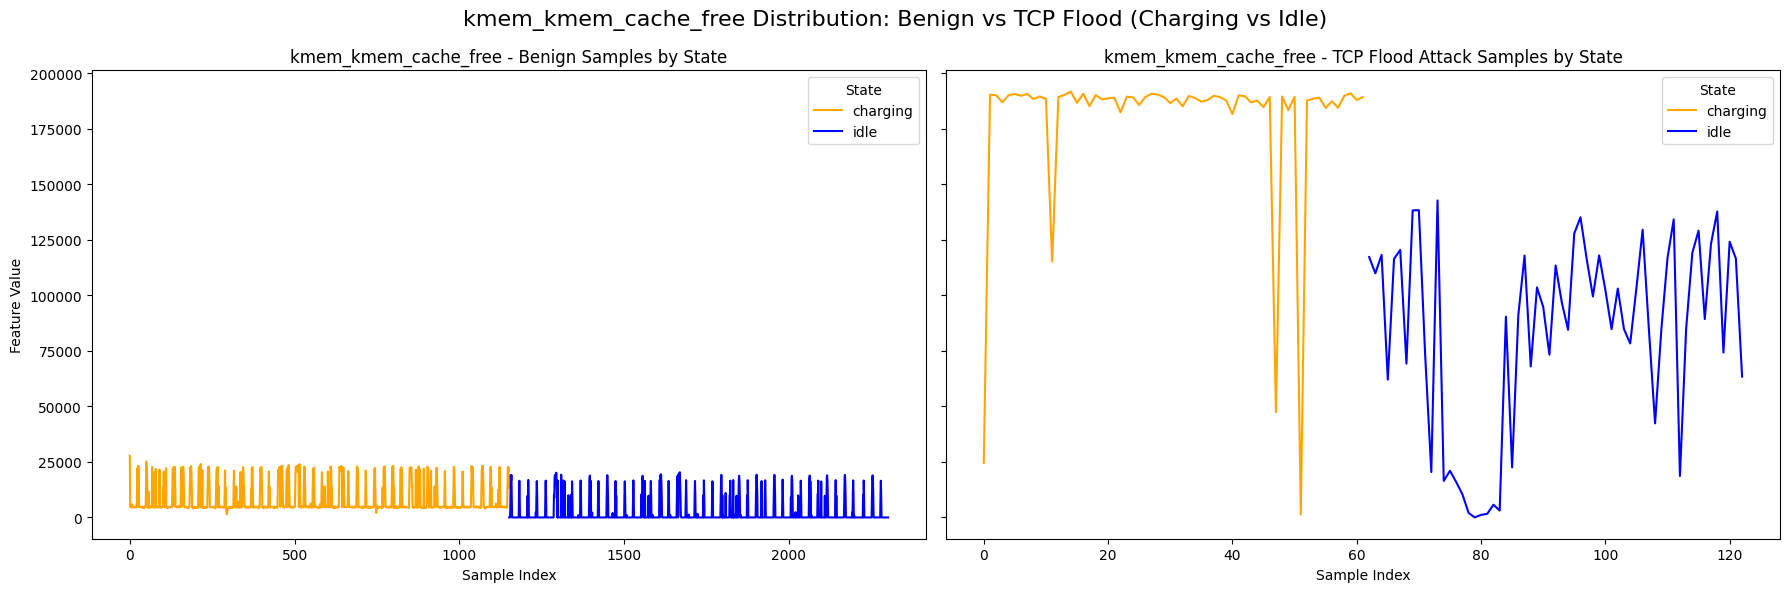

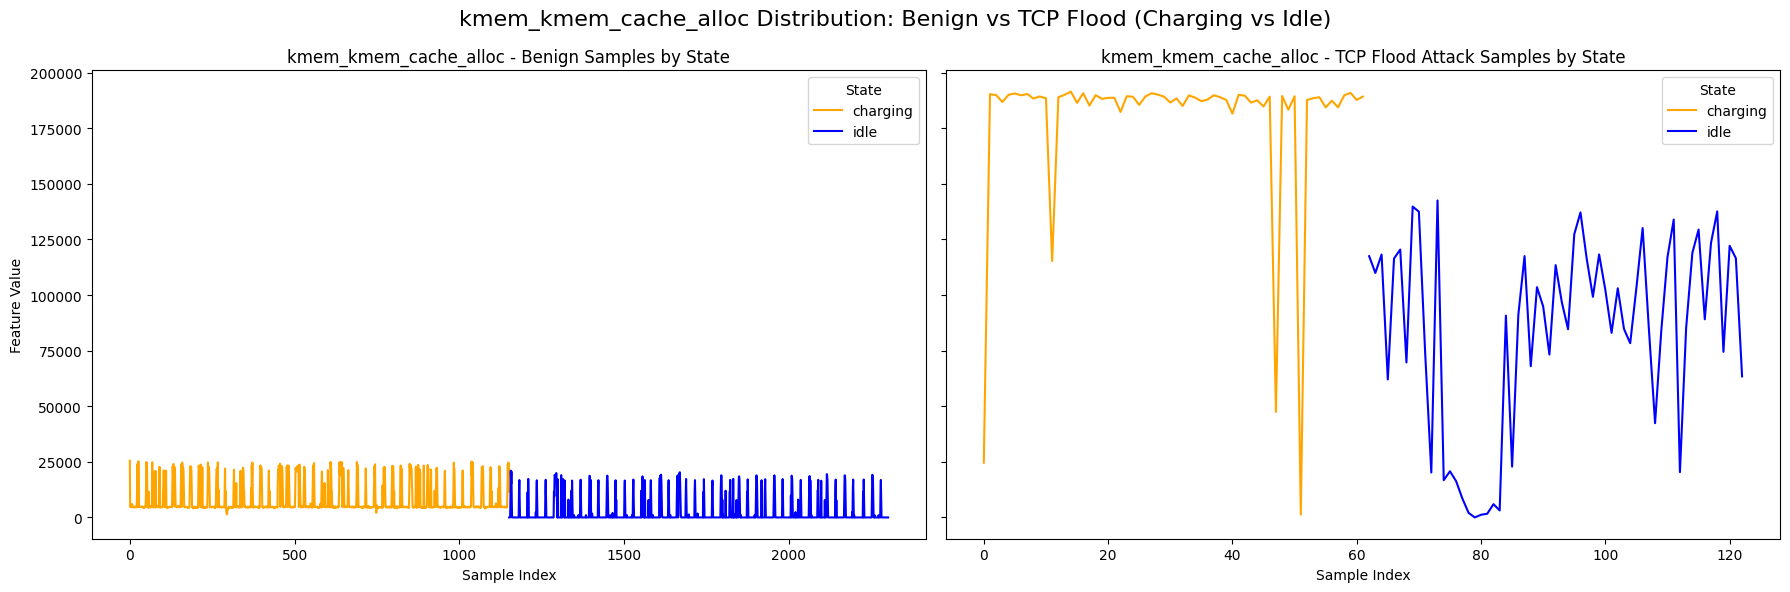

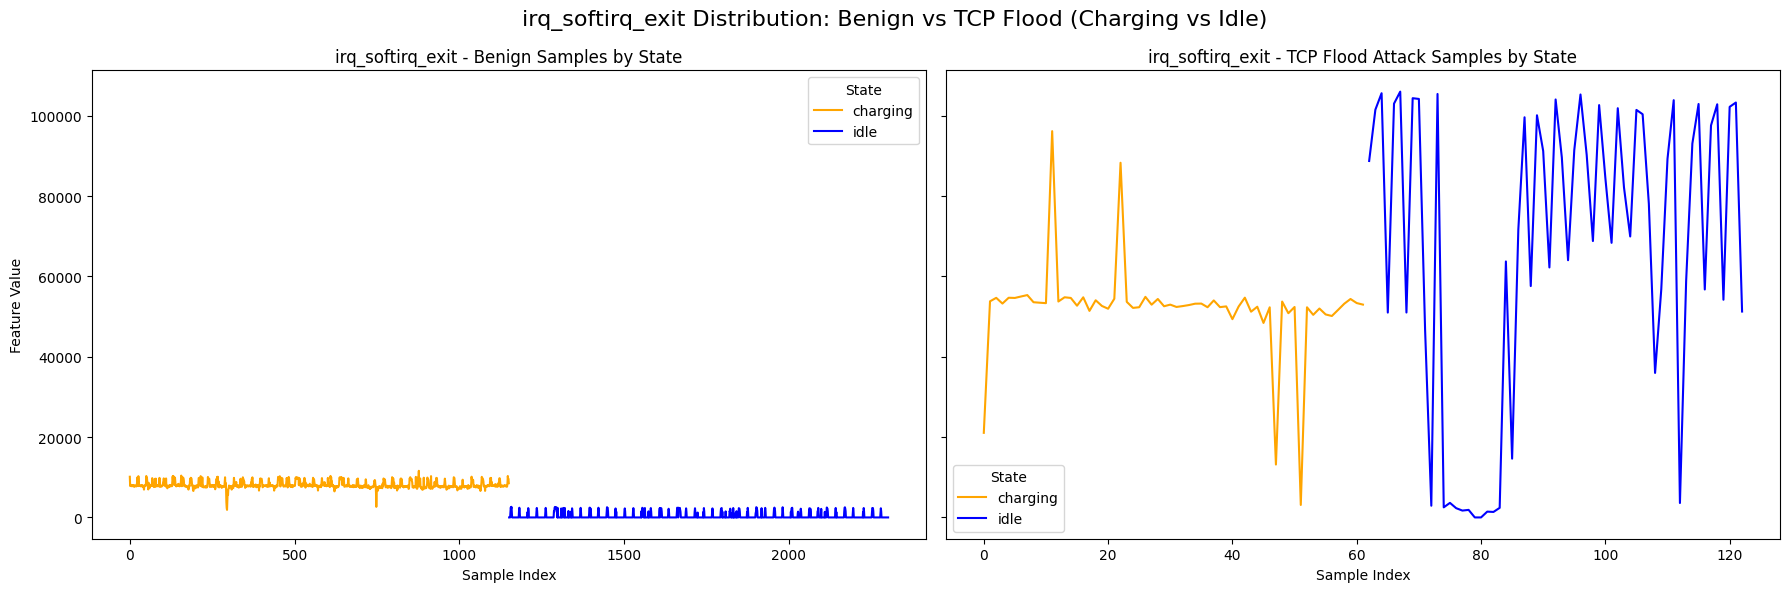

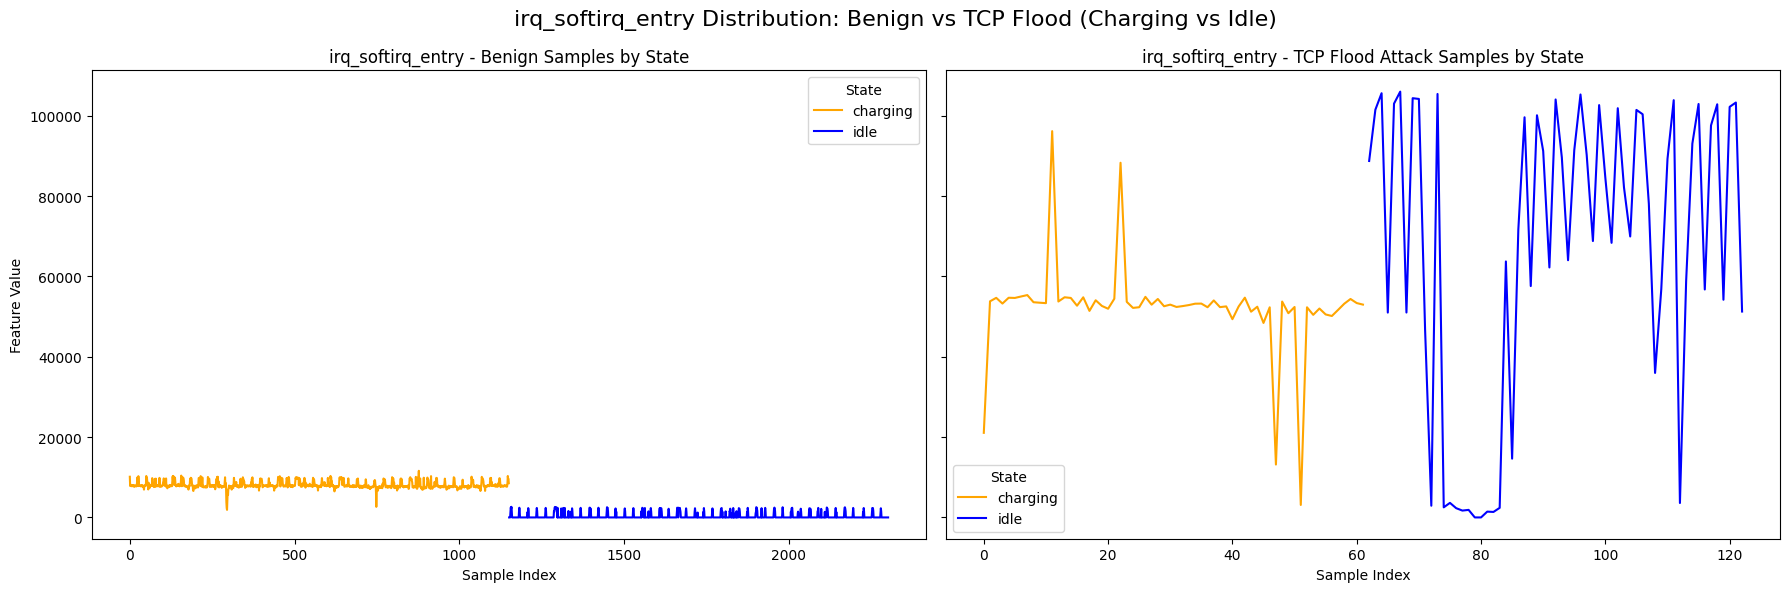

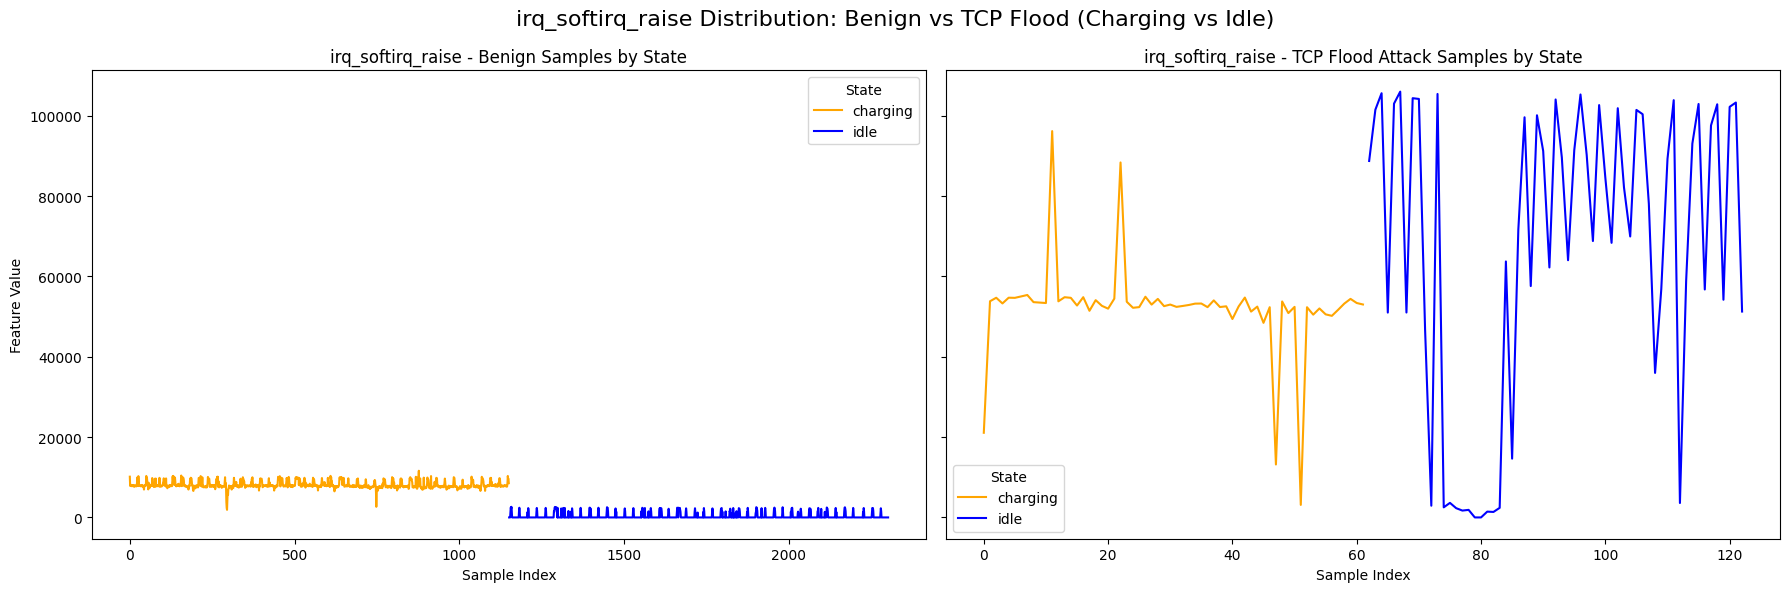

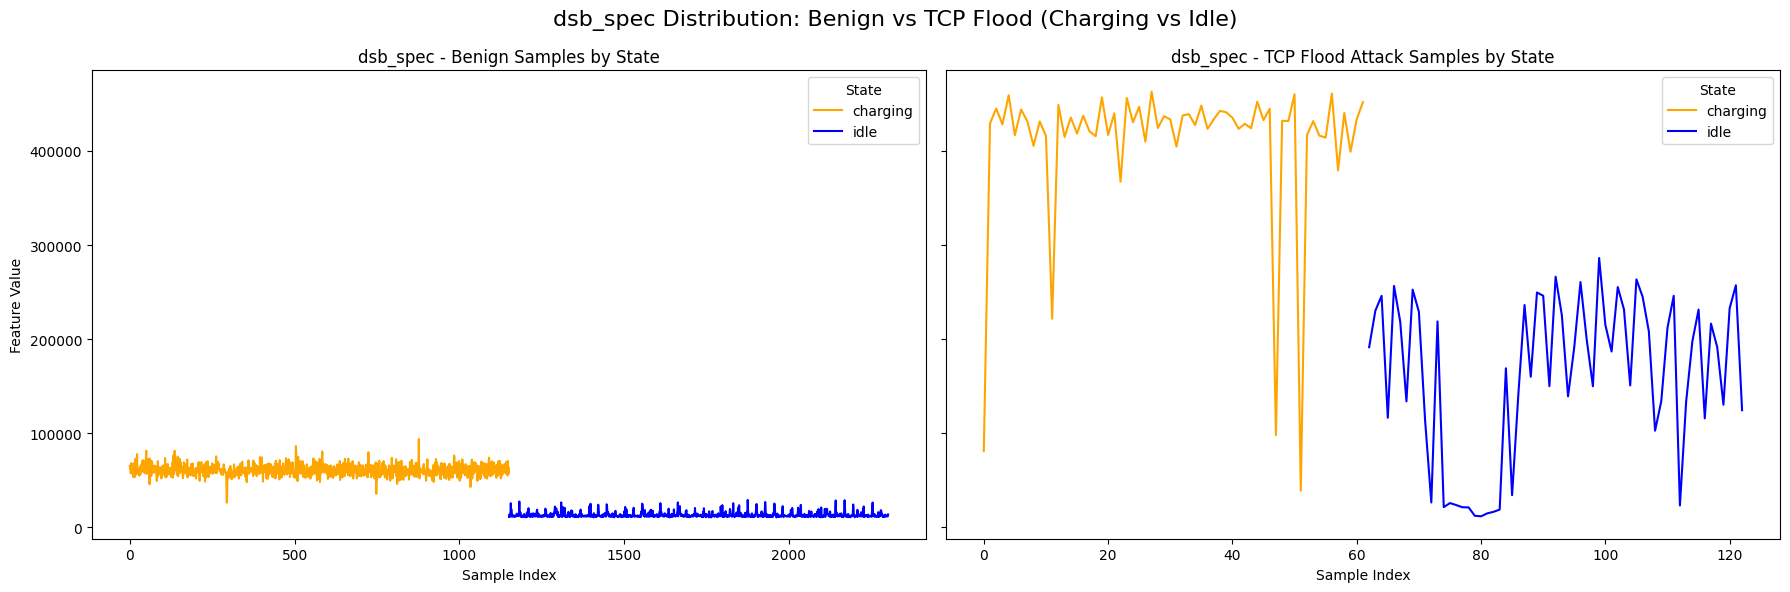

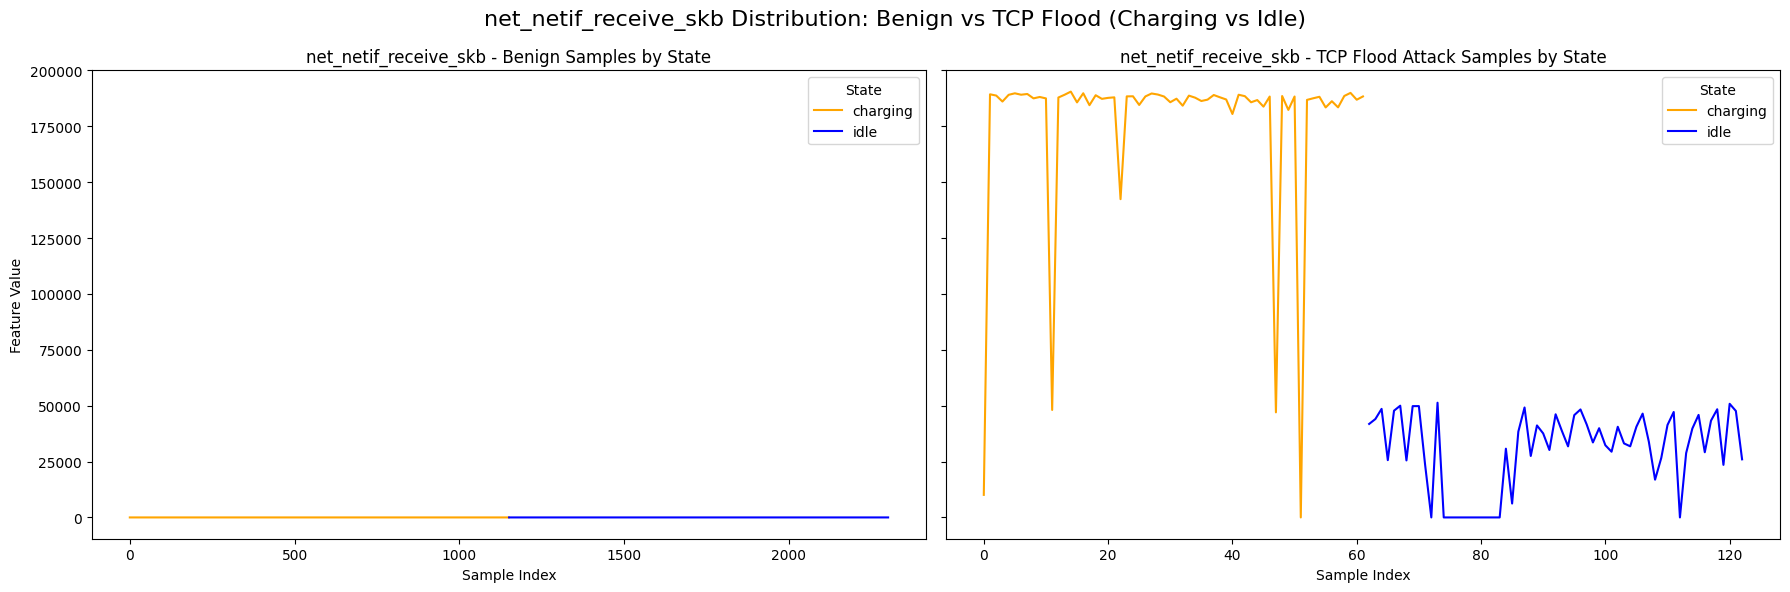

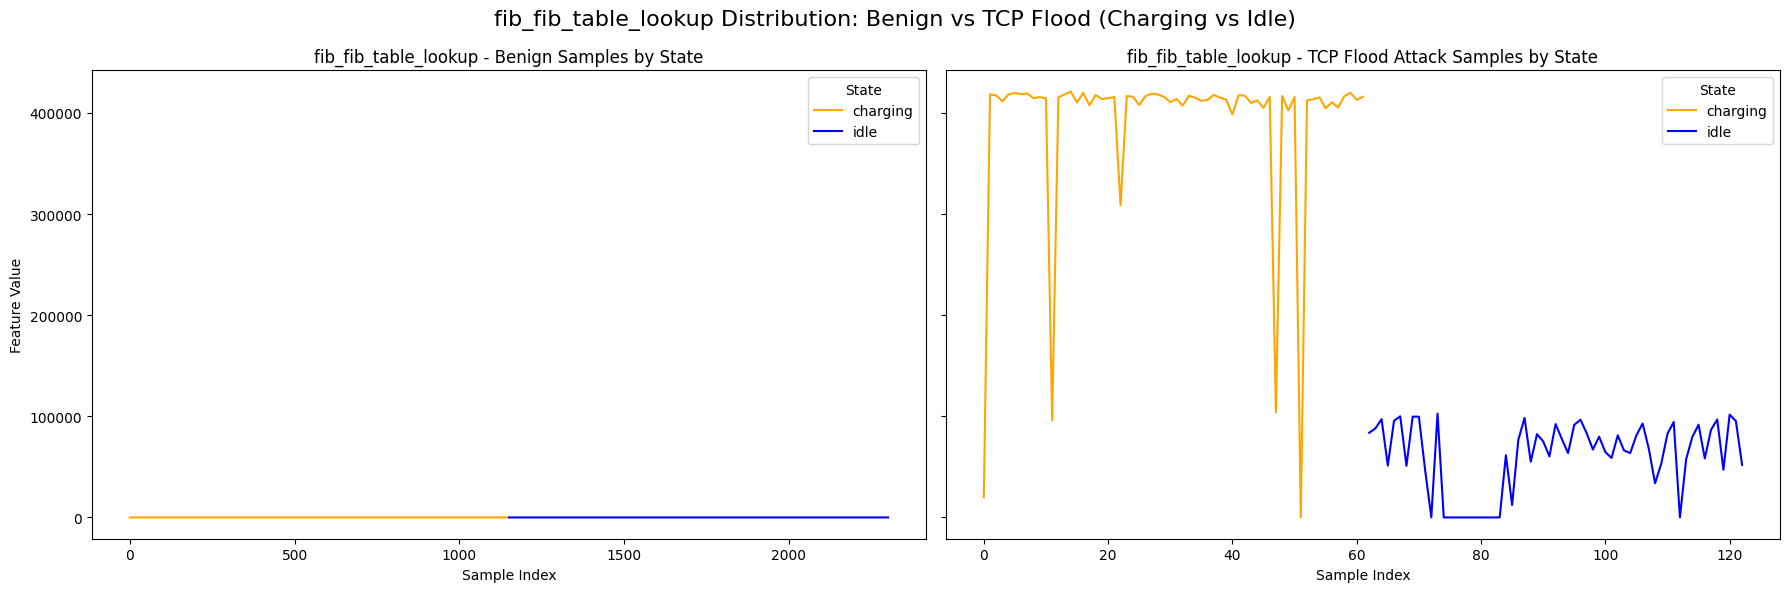

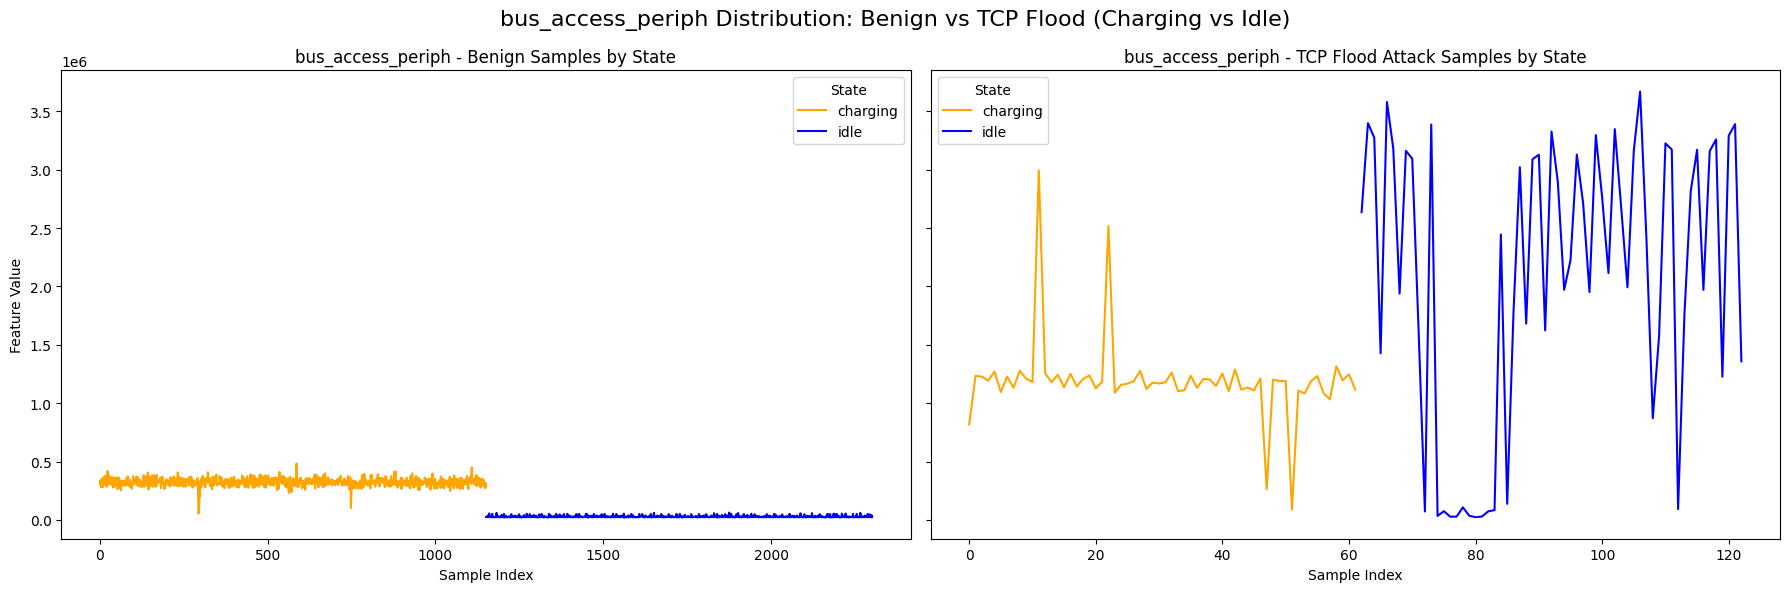

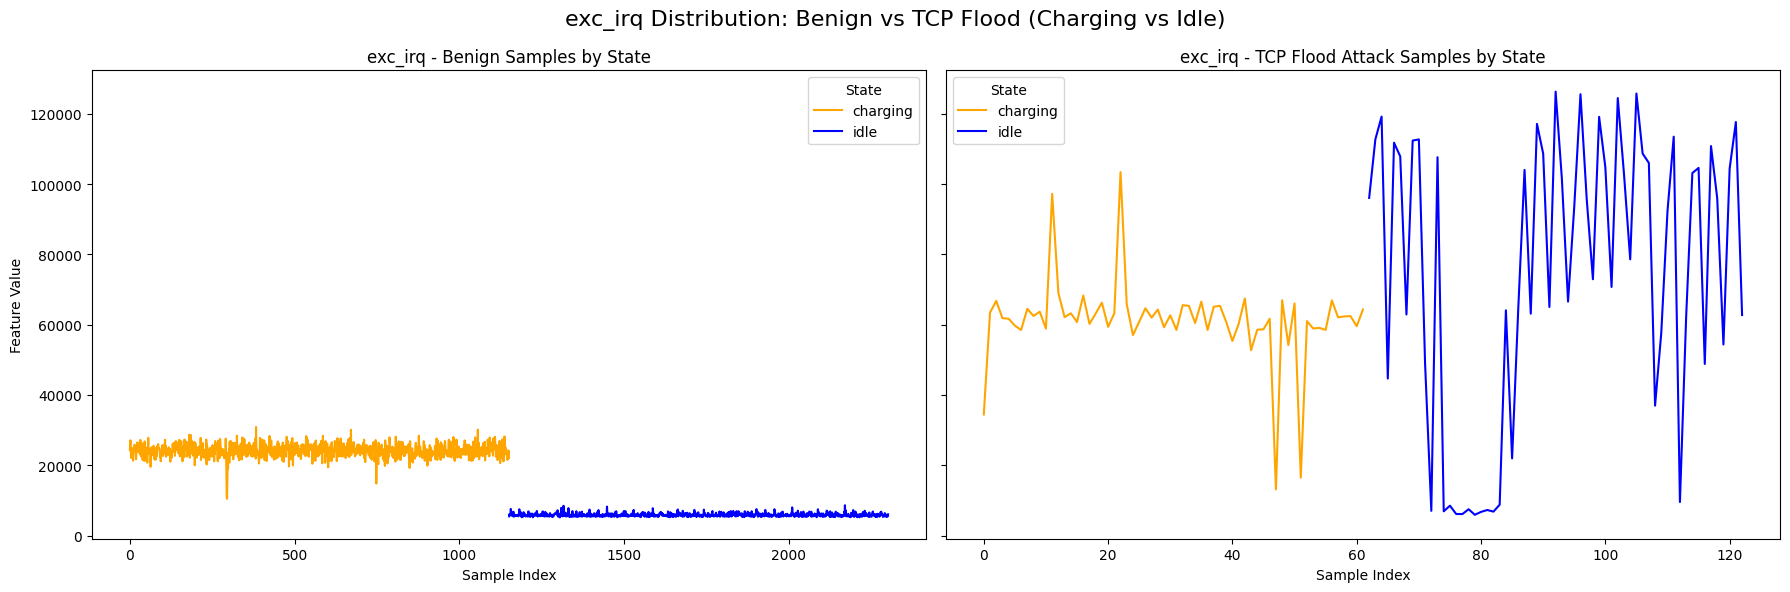

In [ ]:
## a line plot representing the distribution of data of top features selected based on correlation to attack tcp-flood
# Normalize 'State' values to lowercase
df_subset['State'] = df_subset['State'].str.lower()

# Define consistent color palette
state_palette = {'idle': 'blue', 'charging': 'orange'}

# Split data by label
benign_data = df_subset[df_subset['Label'] == 'benign'].reset_index()
attack_data = df_subset[df_subset['Label'] == 'attack'].reset_index()

# Plot each feature side-by-side
for feat in top_features:
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

    # Left: Benign
    sns.lineplot(data=benign_data, x=benign_data.index, y=feat, hue='State', palette=state_palette, ax=axes[0])
    axes[0].set_title(f"{feat} - Benign Samples by State")
    axes[0].set_xlabel("Sample Index")
    axes[0].set_ylabel("Feature Value")

    # Right: Attack
    sns.lineplot(data=attack_data, x=attack_data.index, y=feat, hue='State', palette=state_palette, ax=axes[1])
    axes[1].set_title(f"{feat} - TCP Flood Attack Samples by State")
    axes[1].set_xlabel("Sample Index")

    plt.suptitle(f"{feat} Distribution: Benign vs TCP Flood (Charging vs Idle)", fontsize=16)
    plt.tight_layout()
    plt.show()




#Train Test Validation Split


In [39]:
dfk = pd.read_csv("/content/Kernel_dataset.csv")

In [40]:
dfk

time   ase_spec  block_block_bio_backmerge  block_block_bio_queue  \
0       5.001477  693371795                          0                      0   
1       5.001487  699964025                          0                      0   
2       5.001641  549770341                          0                      0   
3       5.003762  571970875                          0                      0   
4      10.065740  553199786                          0                      0   
...          ...        ...                        ...                    ...   
6161  283.646045    5463807                          0                      0   
6162  288.714173   10977108                          0                      0   
6163  293.790086    3683292                          0                      0   
6164  298.861925    5165840                          0                      0   
6165  300.505634    3909471                          0                      0   

      block_block_bio_remap  block_block_dirty_buffer  block_block_getrq  \
0                         0                         0                  0   
1                         0                         0                  0   
2                         0                         0                  0   
3                         0                         0                  0   
4                         0                         0                  0   
...                     ...                       ...                ...   
6161                      0                         0                  0   
6162                      0                         0                  0   
6163                      0                         0                  0   
6164                      0                         0                  0   
6165                      0                         0                  0   

      block_block_plug  block_block_rq_complete  block_block_rq_insert  ...  \
0                    0                        0                      0  ...   
1                    0                        0                      0  ...   
2                    0                        0                      0  ...   
3                    0                        0                      0  ...   
4                    0                        0                      0  ...   
...                ...                      ...                    ...  ...   
6161                 0                        0                      0  ...   
6162                 0                        0                      0  ...   
6163                 0                        0                      0  ...   
6164                 0                        0                      0  ...   
6165                 0                        0                      0  ...   

      vfp_spec  writeback_writeback_dirty_inode  \
0       215675                                0   
1        72029                                0   
2        87776                                0   
3       239473                                0   
4       186538                                0   
...        ...                              ...   
6161    828202                                0   
6162    337160                                0   
6163    151134                                0   
6164    314585                                0   
6165    309843                                0   

      writeback_writeback_dirty_inode_start  writeback_writeback_dirty_page  \
0                                         0                               0   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               0   
...                                     ...                             ...   
6161       

In [41]:
dfk1=dfk.copy()

In [57]:
# Step 1: Drop metadata columns
dfk1_clean = dfk1.drop(columns=['Label', 'Scenario', 'interface'], errors='ignore')

In [58]:
dfk1_clean

time   ase_spec  block_block_bio_backmerge  block_block_bio_queue  \
0       5.001477  693371795                          0                      0   
1       5.001487  699964025                          0                      0   
2       5.001641  549770341                          0                      0   
3       5.003762  571970875                          0                      0   
4      10.065740  553199786                          0                      0   
...          ...        ...                        ...                    ...   
6161  283.646045    5463807                          0                      0   
6162  288.714173   10977108                          0                      0   
6163  293.790086    3683292                          0                      0   
6164  298.861925    5165840                          0                      0   
6165  300.505634    3909471                          0                      0   

      block_block_bio_remap  block_block_dirty_buffer  block_block_getrq  \
0                         0                         0                  0   
1                         0                         0                  0   
2                         0                         0                  0   
3                         0                         0                  0   
4                         0                         0                  0   
...                     ...                       ...                ...   
6161                      0                         0                  0   
6162                      0                         0                  0   
6163                      0                         0                  0   
6164                      0                         0                  0   
6165                      0                         0                  0   

      block_block_plug  block_block_rq_complete  block_block_rq_insert  ...  \
0                    0                        0                      0  ...   
1                    0                        0                      0  ...   
2                    0                        0                      0  ...   
3                    0                        0                      0  ...   
4                    0                        0                      0  ...   
...                ...                      ...                    ...  ...   
6161                 0                        0                      0  ...   
6162                 0                        0                      0  ...   
6163                 0                        0                      0  ...   
6164                 0                        0                      0  ...   
6165                 0                        0                      0  ...   

      unaligned_ld_spec  unaligned_ldst_spec  unaligned_st_spec  vfp_spec  \
0              21393263             21235046             230217    215675   
1              20477386             20587809              85302     72029   
2              18897596             18987543             169154     87776   
3              17838136             17946801             325006    239473   
4              16962451             16782491             289934    186538   
...                 ...                  ...                ...       ...   
6161            2276063              3411797             677442    828202   
6162            2325968              3090660             671197    337160   
6163            2715096              3195777             620972    151134   
6164            2255394              3242984             750083    314585   
6165            3026430              3652478             754018    309843   

      writeback_writeback_dirty_inode  writeback_writeback_dirty_inode_start  \
0                                   0                                      0   
1                                   0                                      0   
2           

## Splitting

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Encode 'State' as binary (Idle=0, Charging=1)
dfk1_encoded = dfk1_clean.copy()
dfk1_encoded['State'] = dfk1_encoded['State'].map({'idle': 0, 'Charging': 1})

# Step 2: Create stratification key (Attack + State)
dfk1_encoded['stratify_key'] = dfk1_encoded['Attack'].astype(str) + "_" + dfk1_encoded['State'].astype(str)

# Step 3: Train/Validation/Test Split
# First split: Train + Temp (80% train, 20% temp)
train_df, temp_df = train_test_split(
    dfk1_encoded,
    test_size=0.2,
    stratify=dfk1_encoded['stratify_key'],
    random_state=42
)

# Second split: Validation + Test (10% each of total)
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df['stratify_key'],
    random_state=42
)

# Step 4: Drop stratification key from final splits
for df in [train_df, val_df, test_df]:
    df.drop(columns=['stratify_key'], inplace=True)

# Step 5: Save splits to disk
train_df.to_csv('dfk1_train.csv', index=False)
val_df.to_csv('dfk1_val.csv', index=False)
test_df.to_csv('dfk1_test.csv', index=False)

print(train_df['State'].value_counts())
print(val_df['State'].value_counts())
print(test_df['State'].value_counts())

State
1    2866
0    2066
Name: count, dtype: int64
State
1    359
0    258
Name: count, dtype: int64
State
1    359
0    258
Name: count, dtype: int64


In [134]:
dfk1_encoded

time   ase_spec  block_block_bio_backmerge  block_block_bio_queue  \
0       5.001477  693371795                          0                      0   
1       5.001487  699964025                          0                      0   
2       5.001641  549770341                          0                      0   
3       5.003762  571970875                          0                      0   
4      10.065740  553199786                          0                      0   
...          ...        ...                        ...                    ...   
6161  283.646045    5463807                          0                      0   
6162  288.714173   10977108                          0                      0   
6163  293.790086    3683292                          0                      0   
6164  298.861925    5165840                          0                      0   
6165  300.505634    3909471                          0                      0   

      block_block_bio_remap  block_block_dirty_buffer  block_block_getrq  \
0                         0                         0                  0   
1                         0                         0                  0   
2                         0                         0                  0   
3                         0                         0                  0   
4                         0                         0                  0   
...                     ...                       ...                ...   
6161                      0                         0                  0   
6162                      0                         0                  0   
6163                      0                         0                  0   
6164                      0                         0                  0   
6165                      0                         0                  0   

      block_block_plug  block_block_rq_complete  block_block_rq_insert  ...  \
0                    0                        0                      0  ...   
1                    0                        0                      0  ...   
2                    0                        0                      0  ...   
3                    0                        0                      0  ...   
4                    0                        0                      0  ...   
...                ...                      ...                    ...  ...   
6161                 0                        0                      0  ...   
6162                 0                        0                      0  ...   
6163                 0                        0                      0  ...   
6164                 0                        0                      0  ...   
6165                 0                        0                      0  ...   

      unaligned_ldst_spec  unaligned_st_spec  vfp_spec  \
0                21235046             230217    215675   
1                20587809              85302     72029   
2                18987543             169154     87776   
3                17946801             325006    239473   
4                16782491             289934    186538   
...                   ...                ...       ...   
6161              3411797             677442    828202   
6162              3090660             671197    337160   
6163              3195777             620972    151134   
6164              3242984             750083    314585   
6165              3652478             754018    309843   

      writeback_writeback_dirty_inode  writeback_writeback_dirty_inode_start  \
0                                   0                                      0   
1                                   0                                      0   
2                                   0                                      0   
3                                   0                                      0   
4                                   0                                      0   


## Test Data

In [138]:
dfk1_test = pd.read_csv("/content/dfk1_test.csv")

In [139]:
dfk1_test

time   ase_spec  block_block_bio_backmerge  block_block_bio_queue  \
0    1866.397638    5510264                          0                      0   
1    1413.209545  543272755                          0                      0   
2    3621.601482  767702884                          0                      0   
3     304.189097     816324                          0                      0   
4    2023.574671    5208169                          0                      0   
..           ...        ...                        ...                    ...   
612     5.001477  693371795                          0                      0   
613  1398.811733  568647592                          0                      0   
614   675.881569  551632312                          0                      0   
615   635.197469  539306329                          0                      0   
616   177.285318    3022510                          0                      0   

     block_block_bio_remap  block_block_dirty_buffer  block_block_getrq  \
0                        0                         0                  0   
1                        0                         0                  0   
2                        0                         0                  0   
3                        0                         0                  0   
4                        0                         0                  0   
..                     ...                       ...                ...   
612                      0                         0                  0   
613                      0                         0                  0   
614                      0                         0                  0   
615                      0                         0                  0   
616                      0                         0                  0   

     block_block_plug  block_block_rq_complete  block_block_rq_insert  ...  \
0                   0                        0                      0  ...   
1                   0                        0                      0  ...   
2                   0                        0                      0  ...   
3                   0                        0                      0  ...   
4                   0                        0                      0  ...   
..                ...                      ...                    ...  ...   
612                 0                        0                      0  ...   
613                 0                        0                      0  ...   
614                 0                        0                      0  ...   
615                 0                        0                      0  ...   
616                 0                        0                      0  ...   

     unaligned_ld_spec  unaligned_ldst_spec  unaligned_st_spec  vfp_spec  \
0              1482502              1657598             295326    448895   
1             17947572             18015604             256089    216422   
2             21480385             21812067             110296     20258   
3               157514               191078              36418    951887   
4              1215605              1661536             309479    288903   
..                 ...                  ...                ...       ...   
612           21393263             21235046             230217    215675   
613           17275958             17521475             306841    216083   
614           17276172             17639870             240644    185759   
615           18437936             18592710             229924    177478   
616            2958024              8513271            5356827    732031   

     writeback_writeback_dirty_inode  writeback_writeback_dirty_inode_start  \
0                                  0                                      0   
1                                  0                                      0   
2                                  0               

##Train Data

In [140]:
dfk1_train = pd.read_csv("/content/dfk1_train.csv")

In [141]:
dfk1_train

time   ase_spec  block_block_bio_backmerge  \
0      349.722528    4319648                          0   
1      136.799696  574783927                          0   
2     2701.251731    5210377                          0   
3     5714.273482    1219581                          0   
4      238.126488       1437                          0   
...           ...        ...                        ...   
4927  1748.463668    5229100                          0   
4928  3542.435690  645314103                          0   
4929    91.146561    6067196                          0   
4930  2196.555219    5113594                          0   
4931  1847.349525    4925536                          0   

      block_block_bio_queue  block_block_bio_remap  block_block_dirty_buffer  \
0                      1108                   1108                         0   
1                         0                      0                         0   
2                         0                      0                         0   
3                         0                      0                         0   
4                         0                      0                         0   
...                     ...                    ...                       ...   
4927                      0                      0                         0   
4928                      0                      0                         0   
4929                      0                      0                         0   
4930                      0                      0                         0   
4931                      0                      0                         0   

      block_block_getrq  block_block_plug  block_block_rq_complete  \
0                  1048                 0                     1048   
1                     0                 0                        0   
2                     0                 0                        0   
3                     0                 0                        0   
4                     0                 0                        0   
...                 ...               ...                      ...   
4927                  0                 0                        0   
4928                  0                 0                        0   
4929                  0                 0                        0   
4930                  0                 0                        0   
4931                  0                 0                        0   

      block_block_rq_insert  ...  unaligned_ld_spec  unaligned_ldst_spec  \
0                      1048  ...            5049764              7581292   
1                         0  ...           18810799             19448396   
2                         0  ...            1446114              1783319   
3                         0  ...            1507090              1657240   
4                         0  ...             361015               565674   
...                     ...  ...                ...                  ...   
4927                      0  ...            1623961              1855385   
4928                      0  ...           21496481             21527571   
4929                      0  ...            2742415              3394882   
4930                      0  ...            1392297              1683220   
4931                      0  ...            1222823              1548658   

      unaligned_st_spec  vfp_spec  writeback_writeback_dirty_inode  \
0               1827261   1577141                                0   
1                200177    144046                                0   
2                303936    244920                                0   
3                143458     39209                                0   
4                182010      1284                                0   
...                 ...       ...                              ...   
4927             290985    221729                                0   
4928              49318      

##Validation Data

In [142]:
dfk1_val = pd.read_csv("/content/dfk1_val.csv")

In [143]:
dfk1_val

time   ase_spec  block_block_bio_backmerge  block_block_bio_queue  \
0    5704.149378          0                          0                      0   
1    2581.189484    6064826                          0                      0   
2    4552.851926       2039                          0                      0   
3      70.895024    2100450                          0                      0   
4     303.816749    2096291                          0                      0   
..           ...        ...                        ...                    ...   
612   248.283685  573306430                          0                      0   
613   116.369389  561693041                          0                      0   
614    20.194681    3501157                          0                      0   
615  1887.825518    7981080                          0                      0   
616  1759.073454    5889781                          0                      0   

     block_block_bio_remap  block_block_dirty_buffer  block_block_getrq  \
0                        0                         0                  0   
1                        0                         0                  0   
2                        0                         0                  0   
3                        0                         0                  0   
4                        0                         0                  0   
..                     ...                       ...                ...   
612                      0                         0                  0   
613                      0                         0                  0   
614                      0                         0                  0   
615                      0                         0                  0   
616                      0                         0                  0   

     block_block_plug  block_block_rq_complete  block_block_rq_insert  ...  \
0                   0                        0                      0  ...   
1                   0                        0                      0  ...   
2                   0                        0                      0  ...   
3                   0                        0                      0  ...   
4                   0                        0                      0  ...   
..                ...                      ...                    ...  ...   
612                 0                        0                      0  ...   
613                 0                        0                      0  ...   
614                 0                        0                      0  ...   
615                 0                        0                      0  ...   
616                 0                        0                      0  ...   

     unaligned_ld_spec  unaligned_ldst_spec  unaligned_st_spec  vfp_spec  \
0                47907                84868              16699         0   
1              1526525              1651343             251602    157574   
2                14592                18852               2483         0   
3              3110150              3222619             196254   1258420   
4              1410912              1740880             320395    263787   
..                 ...                  ...                ...       ...   
612           18739132             18499312             193573    120155   
613           17961856             18610844             266113    145951   
614            4170656              5811528            1228669    634848   
615            2476424              2720613             364537    230360   
616            1454456              1680789             293161    200007   

     writeback_writeback_dirty_inode  writeback_writeback_dirty_inode_start  \
0                                  0                                      0   
1                                  0                                      0   
2                                  0               

## Analysis of Split

In [146]:
def reconstruct_state(df):
    # Reconstruct 'State' from 0/1 encoding
    if 'State' in df.columns:
        return df['State'].map({1: 'Charging', 0: 'Idle'})
    else:
        raise KeyError("State column not found.")

def analyze_split(df, name):
    df = df.copy()
    df['State_str'] = reconstruct_state(df)  # create human-readable state

    total_rows = len(df)
    print(f"\n📊 {name} Split — Total rows: {total_rows}")

    attack_state_counts = df.groupby(['Attack', 'State_str']).size().unstack(fill_value=0)
    print(attack_state_counts)

# Run analysis for each split
analyze_split(dfk1_train, "Train")
analyze_split(dfk1_val, "Validation")
analyze_split(dfk1_test, "Test")


📊 Train Split — Total rows: 4932
State_str               Charging  Idle
Attack                                
aggressive-scan               97    48
cryptojacking                921   513
icmp-flood                    53    49
icmp-fragmentation            51    44
icmp-fragmentation_old        49     0
none                         921   921
os-fingerprinting             49    49
os-scan                       47     0
port-scan                    112    49
push-ack-flood                50    52
serice-detection              48     0
service-detection             63    48
syn-flood                     50    50
syn-stealth                  103    48
synonymous-ip-flood           48    50
tcp-flood                     50    49
udp-flood                     49    47
vuln-scan                    105    49

📊 Validation Split — Total rows: 617
State_str               Charging  Idle
Attack                                
aggressive-scan               13     6
cryptojacking                11

#Analysis of encoded dataset

In [147]:
dfk1_analysis = dfk1_encoded.copy()

# Drop stratify_key if present
if 'stratify_key' in dfk1_analysis.columns:
    dfk1_analysis.drop(columns=['stratify_key'], inplace=True)

In [152]:
dfk1_analysis

time   ase_spec  block_block_bio_backmerge  block_block_bio_queue  \
0       5.001477  693371795                          0                      0   
1       5.001487  699964025                          0                      0   
2       5.001641  549770341                          0                      0   
3       5.003762  571970875                          0                      0   
4      10.065740  553199786                          0                      0   
...          ...        ...                        ...                    ...   
6161  283.646045    5463807                          0                      0   
6162  288.714173   10977108                          0                      0   
6163  293.790086    3683292                          0                      0   
6164  298.861925    5165840                          0                      0   
6165  300.505634    3909471                          0                      0   

      block_block_bio_remap  block_block_dirty_buffer  block_block_getrq  \
0                         0                         0                  0   
1                         0                         0                  0   
2                         0                         0                  0   
3                         0                         0                  0   
4                         0                         0                  0   
...                     ...                       ...                ...   
6161                      0                         0                  0   
6162                      0                         0                  0   
6163                      0                         0                  0   
6164                      0                         0                  0   
6165                      0                         0                  0   

      block_block_plug  block_block_rq_complete  block_block_rq_insert  ...  \
0                    0                        0                      0  ...   
1                    0                        0                      0  ...   
2                    0                        0                      0  ...   
3                    0                        0                      0  ...   
4                    0                        0                      0  ...   
...                ...                      ...                    ...  ...   
6161                 0                        0                      0  ...   
6162                 0                        0                      0  ...   
6163                 0                        0                      0  ...   
6164                 0                        0                      0  ...   
6165                 0                        0                      0  ...   

      unaligned_ld_spec  unaligned_ldst_spec  unaligned_st_spec  vfp_spec  \
0              21393263             21235046             230217    215675   
1              20477386             20587809              85302     72029   
2              18897596             18987543             169154     87776   
3              17838136             17946801             325006    239473   
4              16962451             16782491             289934    186538   
...                 ...                  ...                ...       ...   
6161            2276063              3411797             677442    828202   
6162            2325968              3090660             671197    337160   
6163            2715096              3195777             620972    151134   
6164            2255394              3242984             750083    314585   
6165            3026430              3652478             754018    309843   

      writeback_writeback_dirty_inode  writeback_writeback_dirty_inode_start  \
0                                   0                                      0   
1                                   0                                      0   
2           

In [153]:
def reconstruct_state(df):
    # Reconstruct 'State' from 0/1 encoding
    if 'State' in df.columns:
        return df['State'].map({1: 'Charging', 0: 'Idle'})
    else:
        raise KeyError("State column not found.")

def analyze_split(df, name):
    df = df.copy()
    df['State_str'] = reconstruct_state(df)  # human-readable state

    total_rows = len(df)
    print(f"\n📊 {name} Split — Total rows: {total_rows}")

    # Attack × State breakdown
    attack_state_counts = df.groupby(['Attack', 'State_str']).size().unstack(fill_value=0)

    # Add row and column totals for easier inspection
    attack_state_counts['Total'] = attack_state_counts.sum(axis=1)
    attack_state_counts.loc['Total'] = attack_state_counts.sum()

    print(attack_state_counts)

# Run analysis on full encoded dataset
analyze_split(dfk1_analysis, "Full Dataset")


📊 Full Dataset Split — Total rows: 6166
State_str               Charging  Idle  Total
Attack                                       
aggressive-scan              122    60    182
cryptojacking               1151   642   1793
icmp-flood                    67    61    128
icmp-fragmentation            64    55    119
icmp-fragmentation_old        61     0     61
none                        1151  1151   2302
os-fingerprinting             62    61    123
os-scan                       59     0     59
port-scan                    140    61    201
push-ack-flood                62    65    127
serice-detection              60     0     60
service-detection             79    60    139
syn-flood                     63    63    126
syn-stealth                  129    60    189
synonymous-ip-flood           60    62    122
tcp-flood                     62    61    123
udp-flood                     61    59    120
vuln-scan                    131    61    192
Total                       3584  2582 

In [154]:
# Copy working dataframe
dfk1_analysis = dfk1_encoded.copy()

# Collect results
charging_results = {}
idle_results = {}

# Columns to exclude from correlation
exclude_cols = ['Attack', 'State']
if 'stratify_key' in dfk1_analysis.columns:
    exclude_cols.append('stratify_key')

# Unique attack types
attack_types = dfk1_analysis['Attack'].unique()

for attack in attack_types:
    df_attack = dfk1_analysis[dfk1_analysis['Attack'] == attack]

    # Charging subset (State=1)
    df_charging = df_attack[df_attack['State'] == 1].copy()
    charging_features = df_charging.drop(columns=exclude_cols).select_dtypes(include='number')
    charging_features = charging_features.loc[:, charging_features.nunique() > 1]
    if not charging_features.empty:
        charging_corr = charging_features.corr().abs().mean().sort_values(ascending=False)
        charging_results[attack] = charging_corr.head(10)

    # Idle subset (State=0)
    df_idle = df_attack[df_attack['State'] == 0].copy()
    idle_features = df_idle.drop(columns=exclude_cols).select_dtypes(include='number')
    idle_features = idle_features.loc[:, idle_features.nunique() > 1]
    if not idle_features.empty:
        idle_corr = idle_features.corr().abs().mean().sort_values(ascending=False)
        idle_results[attack] = idle_corr.head(10)

In [155]:
for attack in attack_types:
    print(f"\n==============================")
    print(f"🔎 Attack: {attack}")
    print("==============================")

    # Charging results
    if attack in charging_results:
        print(f"\n🔌 Charging state top features:")
        print(charging_results[attack])
    else:
        print("\n🔌 Charging state top features: (no data available)")

    # Idle results
    if attack in idle_results:
        print(f"\n🛑 Idle state top features:")
        print(idle_results[attack])
    else:
        print("\n🛑 Idle state top features: (no data available)")



🔎 Attack: cryptojacking

🔌 Charging state top features:
preemptirq_irq_disable     0.386406
preemptirq_irq_enable      0.386405
kmem_kmalloc               0.373472
kmem_kfree                 0.368032
irq_softirq_raise          0.349954
irq_softirq_exit           0.349592
irq_softirq_entry          0.349590
syscalls_sys_enter_read    0.348539
syscalls_sys_exit_read     0.348536
raw_syscalls_sys_exit      0.335431
dtype: float64

🛑 Idle state top features:
raw_syscalls_sys_exit            0.401580
raw_syscalls_sys_enter           0.401564
preemptirq_irq_enable            0.400169
preemptirq_irq_disable           0.400169
kmem_kmem_cache_alloc            0.400124
kmem_kmem_cache_free             0.395856
kmem_kmalloc                     0.394502
kmem_kfree                       0.392483
syscalls_sys_enter_newfstatat    0.390910
syscalls_sys_exit_newfstatat     0.390909
dtype: float64

🔎 Attack: none

🔌 Charging state top features:
kmem_kmalloc                0.733131
kmem_kfree          

# ML Models
(treating as indiviual rather than time series)

In [156]:
dfk1_encoded

time   ase_spec  block_block_bio_backmerge  block_block_bio_queue  \
0       5.001477  693371795                          0                      0   
1       5.001487  699964025                          0                      0   
2       5.001641  549770341                          0                      0   
3       5.003762  571970875                          0                      0   
4      10.065740  553199786                          0                      0   
...          ...        ...                        ...                    ...   
6161  283.646045    5463807                          0                      0   
6162  288.714173   10977108                          0                      0   
6163  293.790086    3683292                          0                      0   
6164  298.861925    5165840                          0                      0   
6165  300.505634    3909471                          0                      0   

      block_block_bio_remap  block_block_dirty_buffer  block_block_getrq  \
0                         0                         0                  0   
1                         0                         0                  0   
2                         0                         0                  0   
3                         0                         0                  0   
4                         0                         0                  0   
...                     ...                       ...                ...   
6161                      0                         0                  0   
6162                      0                         0                  0   
6163                      0                         0                  0   
6164                      0                         0                  0   
6165                      0                         0                  0   

      block_block_plug  block_block_rq_complete  block_block_rq_insert  ...  \
0                    0                        0                      0  ...   
1                    0                        0                      0  ...   
2                    0                        0                      0  ...   
3                    0                        0                      0  ...   
4                    0                        0                      0  ...   
...                ...                      ...                    ...  ...   
6161                 0                        0                      0  ...   
6162                 0                        0                      0  ...   
6163                 0                        0                      0  ...   
6164                 0                        0                      0  ...   
6165                 0                        0                      0  ...   

      unaligned_ld_spec  unaligned_ldst_spec  unaligned_st_spec  vfp_spec  \
0              21393263             21235046             230217    215675   
1              20477386             20587809              85302     72029   
2              18897596             18987543             169154     87776   
3              17838136             17946801             325006    239473   
4              16962451             16782491             289934    186538   
...                 ...                  ...                ...       ...   
6161            2276063              3411797             677442    828202   
6162            2325968              3090660             671197    337160   
6163            2715096              3195777             620972    151134   
6164            2255394              3242984             750083    314585   
6165            3026430              3652478             754018    309843   

      writeback_writeback_dirty_inode  writeback_writeback_dirty_inode_start  \
0                                   0                                      0   
1                                   0                                      0   
2           